# Algorithmes de Sécurité Monétaire : Distinguer les Vrais des Faux Billets avec Précision

L’Organisation nationale de lutte contre le faux-monnayage,
    est une organisation publique ayant pour objectif de mettre en place des
    méthodes d’identification des contrefaçons des billets en euros. Dans le
    cadre de cette lutte, nous souhaitons mettre en place un algorithme qui
    soit capable de différencier automatiquement les vrais des faux billets.

## Objectifs

Lorsqu’un billet arrive, nous avons une machine qui consigne l’ensemble
de ses caractéristiques géométriques. Au travers de nos années de lutte,
nous avons observé des différences de dimensions entre les vrais et les
faux billets. Ces différences sont difficilement notables à l’oeil nu, mais une
machine devrait sans problème arriver à les différencier.
Ainsi, il faudrait construire un algorithme qui, à partir des caractéristiques
géométriques d’un billet, serait capable de définir si ce dernier est un vrai
ou un faux billet.

# SOMMAIRE

* 1. [Exploration et Préparation des données](#chapter1)
    * 1.1 [Importation des librairies Python](#section_1_1)
    * 1.2 [Importation des données](#section_1_2)
    * 1.3 [Vérification des données](#section_1_3)
        * 1.3.1 [Vérification de types de données](#section_1_3_1)
        * 1.3.2 [Vérification des valeurs manquantes](#section_1_3_2)
    * 1.4 [Analyse des variables](#section_1_4)
    * 1.5 [Corrélation entre les variables](#section_1_5)


* 2. [Régression linéaire pour imputer les données manquantes "margin_low"](#chapter2)
    * 2.1 [Analyse des features sur la base Train](#section_2_1)
    * 2.2 [Modélisation sur la base Train](#section_2_2)
    * 2.3 [Evaluation du modèle](#section_2_3)
        * 2.3.1 [Visualisation du modèle](#section_2_3_1)
        * 2.3.2 [Analysons nos résultats: Atypicité et Influence des données](#section_2_3_2)
        * 2.3.3 [Vérification des hypothèses du modèle](#section_2_3_3)
    * 2.4 [Application du modèle](#section_2_4)


* 3. [Analyse exploratoire sur la base complète](#chapter3)
    * 3.1 [Différences Entre les Authenticités 0 et 1](#section_3_1)
    * 3.2 [Analyse des variables](#section_3_2)
        * 3.2.1 [Visualisation des Distributuions](#section_3_2_1)
        * 3.2.2 [Test de Normalité](#section_3_2_2)
    * 3.3 [Analyse des Outliers](#section_3_3)
    * 3.4 [Comparaison de la distribution des variables en fonction de leur authenticité](#section_3_4)
    * 3.5 [Analyse en Composantes Principales (ACP)](#section_3_5)


* 4. [Méthodes de classification](#chapter4)

    * 4.1 [Classification non supervisée: Clustering K-means](#section_4_1)
        * 4.1.1 [Évaluation du Nombre Optimal de Clusters et Coefficient de Silhouette](#section_4_1_1)
        * 4.1.2 [Analyse et Interprétation des Clusters K-means](#section_4_1_2)
        * 4.1.3 [Performance du modèle](#section_4_1_3)
        * 4.1.4 [Application sur des données inconnues](#section_4_1_4)
        
    * 4.2 [Algorithmes de classification supervisée](#section_4_2)
    
        * 4.2.1 [Algorithme: k-NN ( k Nearest Neighbors)](#section_4_2_1)
            * 4.2.1.1 [Préparation des Données](#section_4_2_1_1)
            * 4.2.1.2 [Choix du Paramètre k : Optimisation du score sur les données test](#section_4_2_1_2)
            * 4.2.1.3 [Entraînement du Modèle](#section_4_2_1_3)
            * 4.2.1.4 [Performances du Modèle](#section_4_2_1_4)
            * 4.2.1.5 [Impact des outliers](#section_4_2_1_5)
            * 4.2.1.6 [Application sur des données inconnues](#section_4_2_1_6)

        * 4.2.2 [Régression logistique](#section_4_2_2)
            * 4.2.2.1 [Préparation des Données](#section_4_2_2_1)
            * 4.2.2.2 [Entraînement du Modèle](#section_4_2_2_2)
            * 4.2.2.3 [Vérification des hypothèses du modèle](#section_4_2_2_3)
            * 4.2.2.4 [Performances du modèle de régression logistique](#section_4_2_2_4)
            * 4.2.2.5 [Application sur des données inconnues](#section_4_2_2_5)


* 5. [Comparaison des méthodes de classification et choix final](#chapter5)

* 6. [Fonction finale](#chapter6)



# 1 Exploration et préparation des données  <a id="chapter1"></a>

### 1.1 Importation des librairies Python <a class="anchor" id="section_1_1"></a>

On importe les librairies qui nous permettront de mener à bien notre mission.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Avec Scipy
import scipy.stats as stats
from scipy.stats import t, shapiro

# Avec StatModel
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

from tabulate import tabulate

# Avec Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1.2 Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
data = pd.read_csv('billets.csv', sep=';')
data.head(5)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

Nos données concernent 1500 billets, leur authenticité 'is_genuine' et six informations géométriques par billet:

- length (longueur) : la longueur du billet (en mm) ;
- height_left (hauteur_gauche) : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
- height_right (hauteur_droite) : la hauteur du billet (mesurée sur le côté droit, en mm) ;
- margin_low (marge_haut) : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- margin_up (marge_bas) : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- diagonal : la diagonale du billet (en mm).

Ces informations sont celles avec lesquelles l’algorithme devra opérer.

### 1.3 Vérification des données  <a class="anchor" id="section_1_3"></a>

#### 1.3.1 Vérification de types de données <a class="anchor" id="section_1_3_1"></a>

In [3]:
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [4]:
data['is_genuine'].unique()

array([ True, False])

In [5]:
# Encoder la variable authenticité
data['is_genuine'].replace([False,True], [0,1], inplace=True)
data.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

Parmi les billets, il y a 1000 billets authentiques et 500 de billets contrefaits.


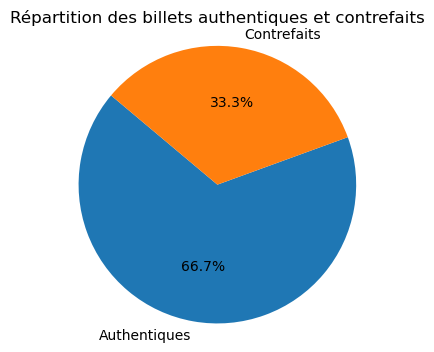

In [6]:
# Compter le nombre de billets avec authenticité=True et authenticité=False
comptage_authentiques = data['is_genuine'].value_counts()

# Créer une liste pour les étiquettes (True et False)
etiquettes = ['Authentiques', 'Contrefaits']

# Extraire le nombre de vrais et de faux billets
nb_vrais_billets = comptage_authentiques.get(1, 0)
nb_faux_billets = comptage_authentiques.get(0, 0)

phrase = f"Parmi les billets, il y a {nb_vrais_billets} billets authentiques et {nb_faux_billets} de billets contrefaits."
print(phrase)

# Créer une liste pour les valeurs
valeurs = [nb_vrais_billets, nb_faux_billets]

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(valeurs, labels=etiquettes, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des billets authentiques et contrefaits')
plt.axis('equal')  # Assurez-vous que le diagramme est circulaire
plt.show()


#### 1.3.2 Vérification des valeurs manquantes <a class="anchor" id="section_1_3_2"></a>

In [7]:
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
# Créer un DataFrame pour les billets authentiques
vrais_billets = data.loc[data['is_genuine'] == 1]

# Créer un DataFrame pour les billets non authentiques
faux_billets = data.loc[data['is_genuine'] == 0]

print(vrais_billets['margin_low'].isnull().sum(),'valeurs manquantes concernent les vrais billets.')
print(faux_billets['margin_low'].isnull().sum(),'valeurs manquantes concernent les faux billets.')

29 valeurs manquantes concernent les vrais billets.
8 valeurs manquantes concernent les faux billets.


On observe qu'il manque 37 valeurs pour la 'margin_low' soit 2.47 %.

Pour compléter les valeurs manquantes de "margin_low" plusieurs méthodes sont possibles :

- Supprimer ces individus 
- Appliquer la moyenne
- Appliquer la médianne
- Utiliser une méthode de ML pour reconstituer ces données (ici, régression linéaire)

Dans notre cas, nous allons utiliser une Régression linéaire multiple pour combler les manques. Nous allons régresser 'margin_low' en fonction des autres variables.

### 1.4 Analyse des variables <a class="anchor" id="section_1_4"></a>

In [9]:
# Indicateurs statistiques
data.describe(include='all') 

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1500.000000  1500.000000  1500.000000   1500.000000  1463.000000   
mean      0.666667   171.958440   104.029533    103.920307     4.485967   
std       0.471562     0.305195     0.299462      0.325627     0.663813   
min       0.000000   171.040000   103.140000    102.820000     2.980000   
25%       0.000000   171.750000   103.820000    103.710000     4.015000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up      length  
count  1500.000000  1500.00000  
mean      3.151473   112.67850  
std       0.231813     0.87273  
min       2.270000   109.49000  
25%       2.990000   112.03000  
50%       3.140000   112.96000  
75%       3.310000   113.34000  
max       3.910000   114.44000

Nous allons exploré les variables numériques.

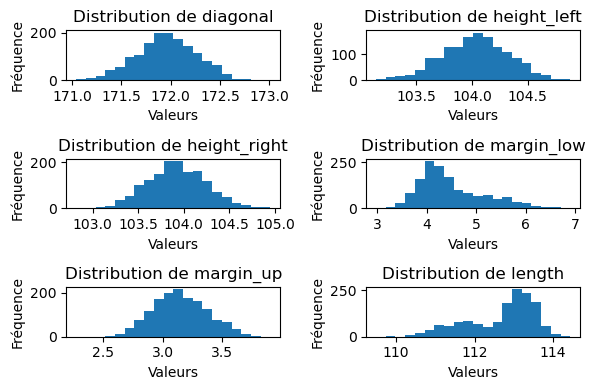

In [10]:
# Sélectionnez les colonnes d'intérêt à partir du DataFrame 'billets'
colonnes_numeriques = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
donnees_numeriques = data[colonnes_numeriques]

# Créez une grille de sous-graphiques
fig, axs = plt.subplots(3, 2, figsize=(6, 4))

# Aplatissez la grille des sous-graphiques pour itérer facilement
axs = axs.ravel()

# Boucle à travers les colonnes sélectionnées et tracez la distribution de chaque variable
for i, column in enumerate(colonnes_numeriques):
    axs[i].hist(donnees_numeriques[column], bins=20)  # Vous pouvez ajuster le nombre de 'bins' selon votre préférence
    axs[i].set_title(f'Distribution de {column}')
    axs[i].set_xlabel('Valeurs')
    axs[i].set_ylabel('Fréquence')

# Pour éviter de superposer les titres des sous-graphiques
plt.tight_layout()
plt.show()


In [11]:
# Créer un sous-DataFrame avec seulement les colonnes spécifiées
sous_df = data[colonnes_numeriques]

# Créer des boxplots interactifs avec Plotly
fig = px.box(sous_df, y=colonnes_numeriques, title='Boxplots interactifs')

# Personnaliser l'apparence (facultatif)
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers+box'))

# Afficher les boxplots interactifs
fig.show()

### 1.5 Corrélation entre les variables <a class="anchor" id="section_1_5"></a>

Création du modèle de régression linéaire : Utilisez les variables explicatives ('diagonal', 'height_left', 'height_right', 'margin_up', 'length') pour ajuster un modèle de régression linéaire qui prédit la variable 'margin_low'.

Nous allons visualiser les nuages de points entre les variables explicatives et la variable à expliquer et calculer la matrice de corrélation entre les variables.

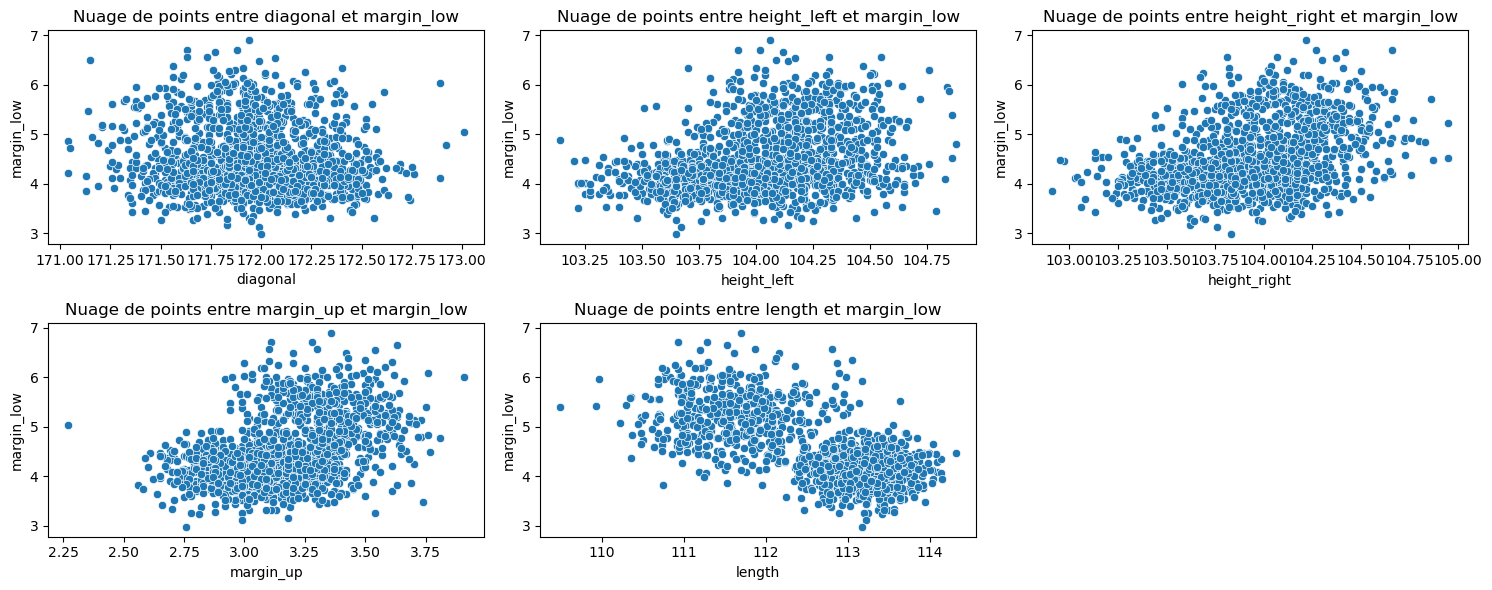

In [12]:
# Sélectionnez les colonnes explicatives
colonnes_explicatives = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# Créez une grille de sous-graphiques 2x3 (2 lignes, 3 colonnes)
plt.figure(figsize=(15, 6))

# Affichez des nuages de points entre 'marge_bas' et toutes les variables explicatives
for i, col in enumerate(colonnes_explicatives, start=1):
    plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes, position actuelle i
    sns.scatterplot(data=data, x=col, y='margin_low')
    plt.title(f'Nuage de points entre {col} et margin_low')
    plt.xlabel(col)
    plt.ylabel('margin_low')

# Ajustez automatiquement l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les nuages de points en 2 par ligne et 3 par colonne
plt.show()


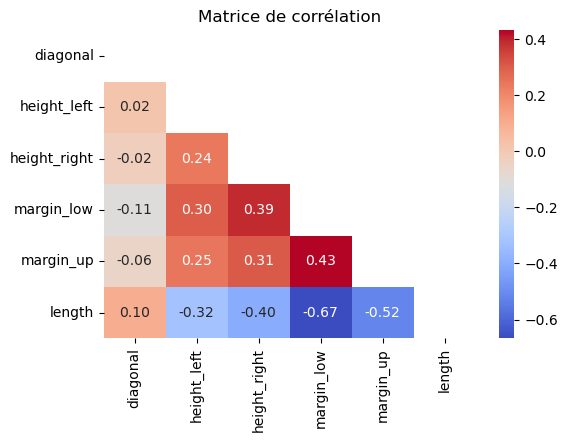

In [13]:
# Créez la matrice de corrélation
corr_matrix = data[colonnes_numeriques].corr()

# Créez une figure
plt.figure(figsize=(6, 4))

# Créez un masque pour la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tracez la heatmap en utilisant le masque pour cacher la moitié supérieure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

plt.title("Matrice de corrélation")
plt.show()

D'après la matrice de corrélation ci-dessus, nous pouvons voir que 'margin_low' est le plus corrélé à 'lengh' (corrélation négative modérée -0.67).


## 2 Régression linéaire pour imputer les données manquantes "margin_low"<a class="anchor" id="chapter2"></a>

Nous allons diviser l'ensemble de données en deux dataframes distincts : l'un contenant les individus ayant une valeur manquante dans la colonne "margin_low", et l'autre contenant les individus ayant des données complètes.

In [14]:
# On créé un Dataset avec les individus qui ont un marge_bas = NaN
donnees_manquantes = data.loc[data["margin_low"].isna()]

# On créé un Dataset sans les valeurs manquantes
donnees_completes = data.dropna()

Nous allons partitionner nos données complètes en deux ensembles distincts : un ensemble d'entraînement "train" et un ensemble de test.

L'ensemble de test nous permet d'évaluer la qualité de nos prédictions en utilisant des données indépendantes de celles que le modèle a déjà vues pendant l'entraînement.

In [15]:
#Diviser les données complètes en ensemble d'apprentissage et en test
train, test = train_test_split(donnees_completes, test_size=0.2, random_state=42)

### 2.1 Analyse des features sur la base Train <a class="anchor" id="section_2_1"></a>

In [16]:
# Indicateurs statistiques
train.describe(include='all') 

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1170.000000  1170.000000  1170.000000   1170.000000  1170.000000   
mean      0.661538   171.962906   104.036077    103.922222     4.484786   
std       0.473389     0.299311     0.300680      0.327694     0.667411   
min       0.000000   171.050000   103.140000    102.910000     2.980000   
25%       0.000000   171.752500   103.820000    103.710000     4.020000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.240000    104.150000     4.860000   
max       1.000000   172.890000   104.880000    104.950000     6.900000   

         margin_up       length  
count  1170.000000  1170.000000  
mean      3.154085   112.674205  
std       0.234868     0.875115  
min       2.270000   109.970000  
25%       2.990000   112.035000  
50%       3.140000   112.950000  
75%       3.310000   113.337500  
max       3.910000   114.320000

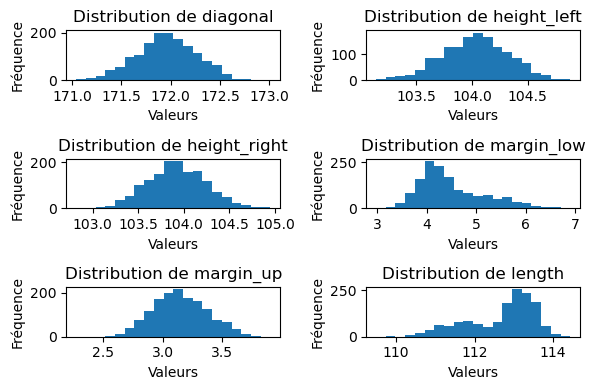

In [17]:
# Créez une grille de sous-graphiques
fig, axs = plt.subplots(3, 2, figsize=(6, 4))

# Aplatissez la grille des sous-graphiques pour itérer facilement
axs = axs.ravel()

# Boucle à travers les colonnes sélectionnées et tracez la distribution de chaque variable
for i, column in enumerate(colonnes_numeriques):
    axs[i].hist(donnees_numeriques[column], bins=20)  # Vous pouvez ajuster le nombre de 'bins' selon votre préférence
    axs[i].set_title(f'Distribution de {column}')
    axs[i].set_xlabel('Valeurs')
    axs[i].set_ylabel('Fréquence')

# Pour éviter de superposer les titres des sous-graphiques
plt.tight_layout()
plt.show()


In [18]:
# Créer un sous-DataFrame avec seulement les colonnes spécifiées
sous_df = train[colonnes_numeriques]

# Créer des boxplots interactifs avec Plotly
fig = px.box(sous_df, y=colonnes_numeriques, title='Boxplots interactifs')

# Personnaliser l'apparence (facultatif)
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers+box'))

# Afficher les boxplots interactifs
fig.show()

Certains points paraissent particulièrement éloignés de leurs groupes, nous allons donc par la suite essayer d'identifier les outliers dans notre jeu de données et vérifier leur impact sur nos modèles.

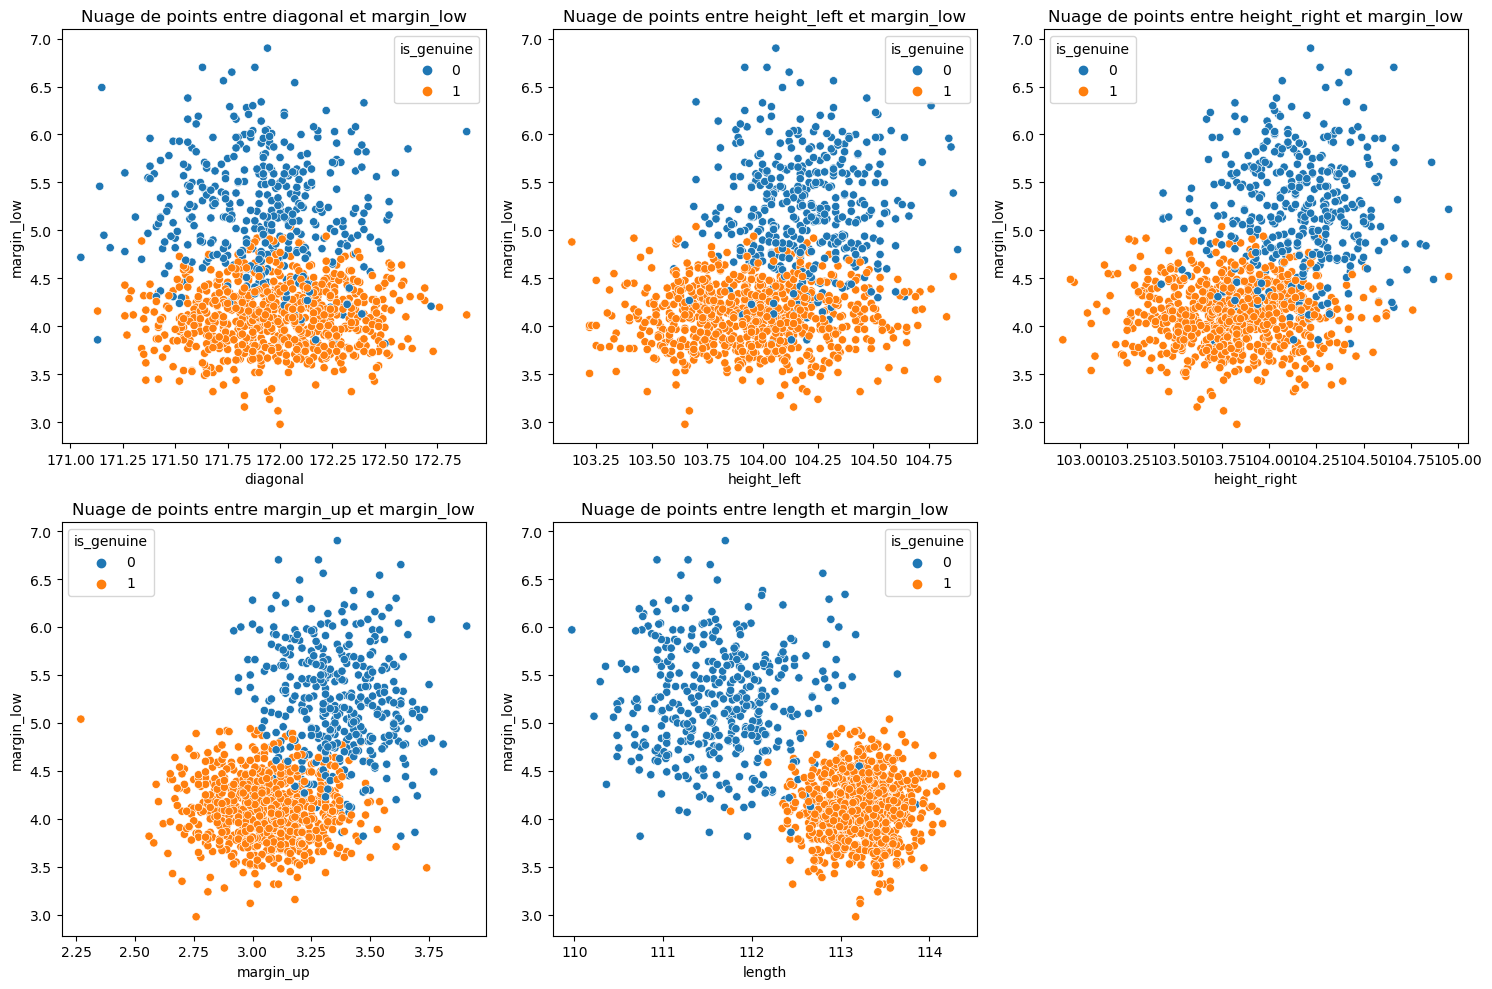

In [19]:
# Définissez le nombre de graphiques par ligne
graphiques_par_ligne = 3

# Calculez le nombre total de lignes nécessaires
nombre_lignes = len(colonnes_explicatives) // graphiques_par_ligne
if len(colonnes_explicatives) % graphiques_par_ligne != 0:
    nombre_lignes += 1

# Créez une figure
fig = plt.figure(figsize=(15, 5 * nombre_lignes))

# Parcourez les colonnes explicatives
for i, col in enumerate(colonnes_explicatives):
    # Créez un sous-graphique dans la grille
    ax = fig.add_subplot(nombre_lignes, graphiques_par_ligne, i + 1)
    
    # Tracez le nuage de points sur l'axe actuel, en distinguant les classes d'authenticité
    sns.scatterplot(data=train, x=col, y='margin_low', hue='is_genuine', ax=ax)
    
    # Ajoutez un titre
    ax.set_title(f'Nuage de points entre {col} et margin_low')
    ax.set_xlabel(col)
    ax.set_ylabel('margin_low')

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez la figure
plt.show()

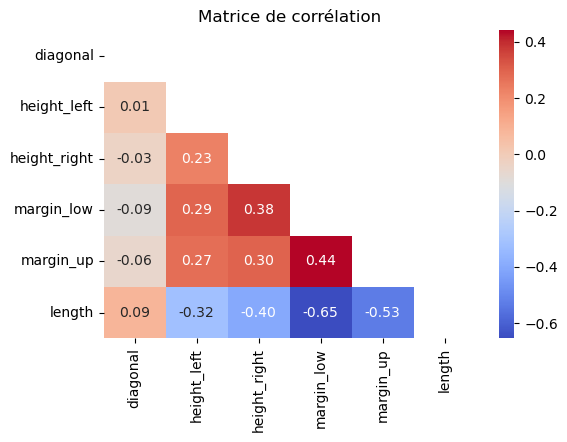

In [20]:
# Créez la matrice de corrélation
corr_matrix = train[colonnes_numeriques].corr()

# Créez une figure
plt.figure(figsize=(6, 4))

# Créez un masque pour la moitié supérieure de la matrice
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tracez la heatmap en utilisant le masque pour cacher la moitié supérieure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

plt.title("Matrice de corrélation")
plt.show()

### 2.2 Modélisation sur la base Train <a class="anchor" id="section_2_2"></a>

In [21]:
# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble d'entraînement
X_train = train.drop(['margin_low','is_genuine'], axis=1)
y_train = train['margin_low']

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble de test
X_test = test.drop(['margin_low','is_genuine'], axis=1)
y_test = test['margin_low']

# Ajouter une constante (terme d'interception) à X_train
X_train = sm.add_constant(X_train)

# Ajuster le modèle de régression linéaire
lr_model = sm.OLS(y_train, X_train).fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     198.7
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          3.54e-153
Time:                        21:33:03   Log-Likelihood:                -825.58
No. Observations:                1170   AIC:                             1663.
Df Residuals:                    1164   BIC:                             1694.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.3960     11.266      1.810   

Cela signifie que le modèle explique 46 % de la variance de la variable dépendante (margin_low). 

On constate que le seul paramètre non significatif est "diagonal" car sa p-valeur est inférieure à 5 %, le niveau de test que nous souhaitons.
On l'enlève donc et on relance la régression.

In [22]:
# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble d'entraînement
X_train = train.drop(['margin_low','is_genuine','diagonal'], axis=1)
y_train = train['margin_low']

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble de test
X_test = test.drop(['margin_low','is_genuine','diagonal'], axis=1)
y_test = test['margin_low']

# Ajouter une constante (terme d'interception) à X_train
X_train = sm.add_constant(X_train)

# Régression linéaire multiple 
lr_model = sm.OLS(y_train, X_train).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.07e-153
Time:                        21:33:03   Log-Likelihood:                -827.22
No. Observations:                1170   AIC:                             1664.
Df Residuals:                    1165   BIC:                             1690.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0775      8.016      0.758   

On constate que tous les paramètres restants sont significatifs. 

Il est à noter que le R² pour notre modèle est de 0.46 ce qui n'est pas idéal. Cette imputation ne concerne que 2.5% de nos données. Un autre choix aurait pu être de supprimer totalement ces données de l'analyse.

### 2.3 Evaluation du modèle <a class="anchor" id="section_2_3"></a>

Les performances du modèle sont évaluées à l'aide de métriques couramment utilisées : l'erreur quadratique (MSE), Racine Carrée de l'erreur quadratique moyenne (RMSE) et le coefficient de détermination (R²).

In [23]:
# Obtention des prédictions et des métriques d'évaluation
y_train_predict = lr_model.predict(sm.add_constant(X_train))
y_test_predict = lr_model.predict(sm.add_constant(X_test))

# score R carré du modèle
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

# erreur quadratique moyenne du modèle
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)

# racine carrée de l'erreur quadratique moyenne du modèle
rmse_train = (np.sqrt(mse_train))
rmse_test = (np.sqrt(mse_test))


#Tableau de résultats 
df_metrics = pd.DataFrame ({
    "Métrique" : ["R2" , "MSE", "RMSE"], 
    "Train":[r2_train,r2_train, rmse_train], 
    "Test": [r2_test ,r2_test , rmse_test]
})
df_metrics

Métrique     Train      Test
0       R2  0.458967  0.539260
1      MSE  0.458967  0.539260
2     RMSE  0.490704  0.440686

 Lorsque les performances sur l'ensemble de test et l'ensemble d'entraînement sont similaires et proches de l'idéal, cela suggère que le modèle a bien appris les tendances sous-jacentes dans les données d'entraînement et peut les appliquer efficacement aux nouvelles données (ensemble de test). 

#### 2.3.1 Visualisation du modèle <a class="anchor" id="section_2_3_1"></a>

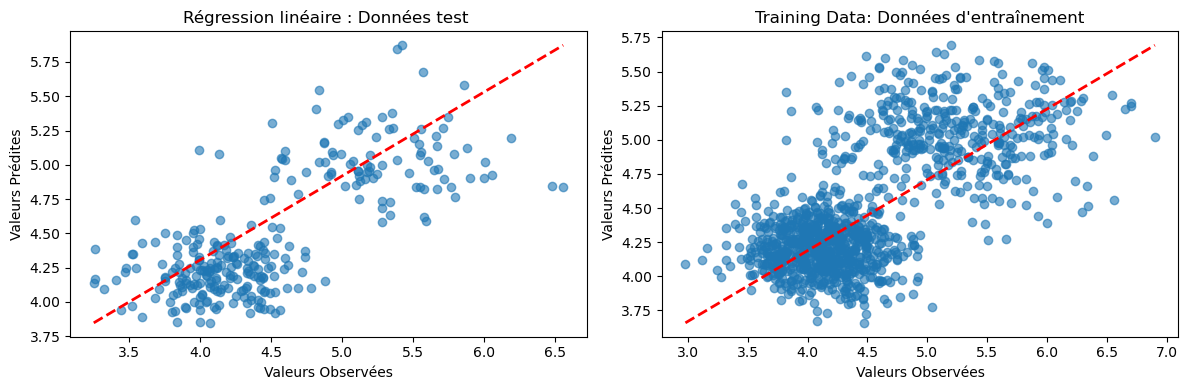

In [24]:
import matplotlib.pyplot as plt

# Créer un graphique de dispersion pour les données test
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 ligne, 2 colonnes

# Premier graphique (Données test)
axes[0].scatter(y_test, y_test_predict, alpha=0.6)
axes[0].set_xlabel("Valeurs Observées")
axes[0].set_ylabel("Valeurs Prédites")
axes[0].set_title("Régression linéaire : Données test ")

# Tracer une ligne diagonale pour montrer l'ajustement parfait
axes[0].plot([min(y_test), max(y_test)], [min(y_test_predict), max(y_test_predict)], color='red', linestyle='--', lw=2)

# Deuxième graphique (Données d'entraînement)
axes[1].scatter(y_train, y_train_predict, alpha=0.6)
axes[1].set_xlabel("Valeurs Observées")
axes[1].set_ylabel("Valeurs Prédites")
axes[1].set_title("Training Data: Données d'entraînement")

# Tracer une ligne diagonale pour montrer l'ajustement parfait
axes[1].plot([min(y_train), max(y_train)], [min(y_train_predict), max(y_train_predict)], color='red', linestyle='--', lw=2)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


#### 2.3.2  Analysons nos résultats: Atypicité et Influence des données <a class="anchor" id="section_2_3_2"></a>

En statistiques et en régression linéaire, les résidus sont les différences entre les valeurs observées et les valeurs prédites par le modèle linéaire.

**Graphiques de Résidus :** Les graphiques de résidus sont des outils importants pour évaluer la performance d'un modèle de régression. Ils permettent de vérifier l'adéquation du modèle en examinant les écarts entre les valeurs observées et les valeurs prédites (résidus).

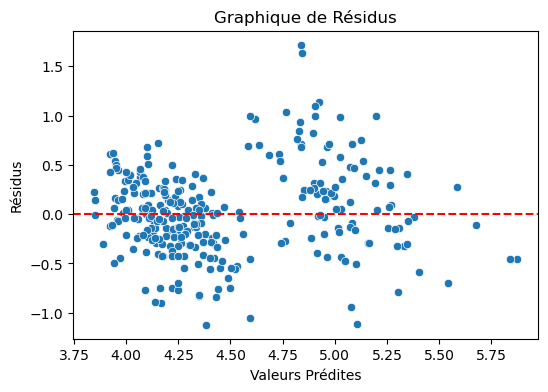

In [25]:
# Calculez les résidus pour l'ensemble de test
residuals = y_test - y_test_predict

# Tracez un graphique de résidus
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_predict, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valeurs Prédites")
plt.ylabel("Résidus")
plt.title("Graphique de Résidus")
plt.show()


Ce graphique permet de voir si les résidus ont une tendance systématique par rapport aux prédictions. Une tendance indique que le modèle a des lacunes.
Dans ce graphique, les résidus semblent être répartis de manière homogène autour de zéro. 



Nous allons maintenant rechercher des valeurs atypiques (outliers) à l'aide de l'analyse des résidus studentisés et des observations influentes avec les leviers ou la distance de cook. 
L'identification d'observations influentes  et atypiques est un résultat significatif dans l'analyse de régression. Cela signifie que ces observations ont un impact important sur le modèle et se distinguent par leurs caractéristiques inhabituelles par rapport aux autres observations.



Nous allons ici réaliser les tests à un niveau $\alpha=5$% :
Récupérons $n$, le nombre d'individus de l'échantillon, et $p$, le nombre de variables.

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé  analyses.
Nous créons un dataframe vide appelé analyses pour stocker les résultats de votre analyse.

In [26]:
# niveau de test
alpha = 0.05
# p est le nombre de prédicteurs et n le nombre d'observations
n = train.shape[0]
p = 4
# analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses
analyses = analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

##### Calculez les résidus studentisés

On considère les résidus studentisés pour évaluer si une observation est atypique. 

Les résidus studentisés sont les différences entre les valeurs observées et les valeurs prédites par le modèle, ajustées pour tenir compte de la variabilité. Les résidus studentisés permettent d'identifier les observations qui sont loin des prédictions du modèle et qui peuvent donc être considérées comme atypiques ou aberrantes. Des résidus studentisés élevés pour une observation suggèrent que cette observation ne suit pas le modèle de manière appropriée.

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [27]:
# Calcul des résidus studentisés
residus_studentises = analyses['rstudent'] = lr_model.get_influence().resid_studentized_internal

# Calcul du seuil de la loi de Student
seuil_rstudent = t.ppf(1 - alpha / 2, n - p - 1)
seuil_rstudent

1.9620023500851527

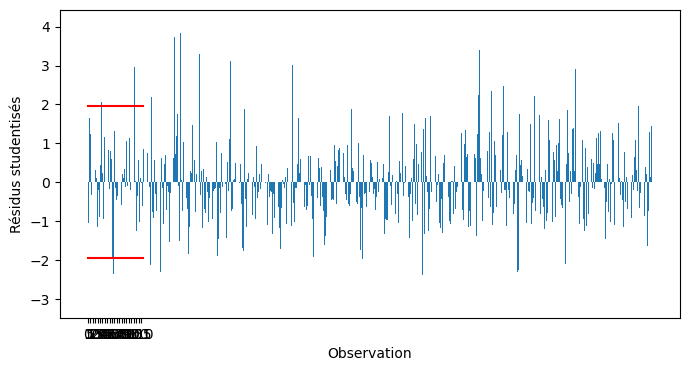

In [28]:
plt.figure(figsize=(8,4))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [29]:
# Liste des observations avec résidus studentisés supérieurs au seuil
observations_anomalies_rstudent = [i for i, residu in enumerate(residus_studentises) if abs(residu) > seuil_rstudent]

# Affichage des numéros d'observations avec résidus studentisés anormaux
print("Observations avec des résidus studentisés anormaux :", observations_anomalies_rstudent)

Observations avec des résidus studentisés anormaux : [5, 24, 26, 27, 30, 52, 90, 93, 96, 116, 129, 131, 147, 150, 163, 179, 182, 190, 191, 231, 238, 250, 284, 295, 336, 366, 402, 417, 424, 450, 477, 493, 535, 556, 569, 614, 637, 657, 684, 694, 717, 753, 768, 810, 812, 837, 842, 862, 879, 891, 893, 896, 926, 965, 991, 1011, 1019, 1142, 1153]


##### Calculez les leviers

Les leviers (Hat Values) sont utilisés pour mesurer l'influence d'une observation sur les coefficients de régression. Un levier élevé pour une observation signifie que cette observation a un effet potentiellement important sur l'estimation des coefficients.

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$ (Belsey).

In [30]:
analyses['levier'] = lr_model.get_influence().hat_matrix_diag

seuil_levier = 2*p/n
seuil_levier

0.006837606837606838

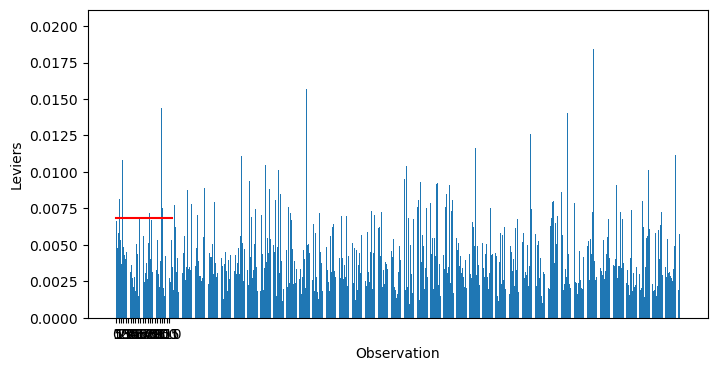

In [31]:
plt.figure(figsize=(8,4))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 115], [seuil_levier, seuil_levier], color='r')
plt.show()

On sélectionne les points pour lesquels le levier est supérieur au seuil, on exécute la ligne suivante :

In [32]:
# Liste des observations avec leviers supérieurs au seuil
observations_anomalies_levier = analyses[analyses['levier'] > seuil_levier].index.tolist()

# Affichage des numéros d'observations avec leviers anormaux
print("Observations avec des leviers anormaux :", observations_anomalies_levier)


Observations avec des leviers anormaux : [6, 12, 26, 27, 30, 34, 38, 40, 49, 50, 54, 55, 68, 77, 88, 90, 93, 95, 119, 120, 125, 127, 133, 134, 147, 155, 158, 168, 179, 182, 185, 196, 202, 203, 210, 213, 227, 240, 246, 259, 276, 277, 280, 285, 287, 288, 291, 296, 301, 309, 317, 330, 336, 340, 349, 357, 361, 368, 383, 393, 394, 404, 421, 449, 460, 462, 467, 477, 483, 497, 509, 510, 518, 520, 524, 529, 532, 535, 540, 545, 547, 550, 555, 565, 566, 594, 596, 598, 601, 602, 618, 625, 627, 631, 643, 652, 661, 664, 666, 674, 683, 685, 690, 691, 695, 696, 697, 707, 745, 750, 776, 777, 796, 842, 859, 861, 883, 890, 893, 905, 907, 914, 915, 916, 924, 931, 935, 936, 951, 958, 970, 973, 988, 990, 1003, 1004, 1027, 1029, 1038, 1041, 1046, 1054, 1058, 1062, 1069, 1074, 1076, 1085, 1092, 1103, 1104, 1107, 1120, 1124, 1131, 1151, 1160]


##### Déterminez la distance de Cook

La mesure de l'influence d'une observation s'effectue à l'aide de la distance de Cook.

La distance de Cook mesure l'influence d'une observation sur les coefficients de régression et sur les prédictions du modèle. Une distance de Cook élevée pour une observation indique que si cette observation était exclue du modèle, les résultats et les prédictions du modèle pourraient changer de manière significative.

Pour trouver la distance de Cook, nous exécutons ceci :

In [33]:
influence = lr_model.get_influence().summary_frame()

Le seuil de la distance de Cook est de n-p. 

In [34]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

On peut détecter les observations influentes comme ceci :

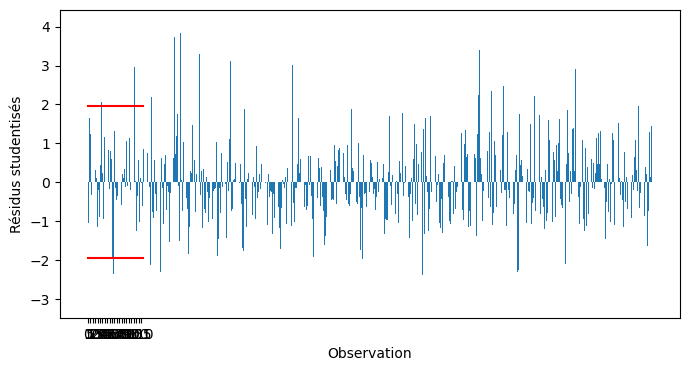

In [35]:
plt.figure(figsize=(8,4))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 115], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 115], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [36]:
# Liste des observations avec distances de Cook supérieures au seuil
observations_anomalies_dcook = analyses[analyses['dcooks'] > seuil_dcook].index.tolist()

# Affichage des indices d'observations avec distances de Cook anormales
print("Indices des observations avec des distances de Cook anormales :", observations_anomalies_dcook)

Indices des observations avec des distances de Cook anormales : [52, 80, 182, 243, 292, 375, 394, 452, 577, 664, 897, 924, 965, 1022, 1027, 1031, 1036, 1041, 1053, 1060, 1074, 1075, 1087, 1089, 1090, 1092, 1094, 1110, 1113, 1124, 1133, 1134, 1143, 1150]


En pratique, on ne retire que les observations atypiques ET influentes.

Il faut maintenant recouper les individus atypiques et les individus influents pour identifier les individus ayant un impact sur la régression linéaire.

In [37]:
# Convertir les listes en ensembles pour effectuer des opérations ensemblistes
set_levier = set(observations_anomalies_levier)
set_dcook = set(observations_anomalies_dcook)
set_rstudent = set(observations_anomalies_rstudent)

# Recherche des observations communes entre influential_observations_cook et outliers rstudent
observations_influ_cook_and_outliers = np.where(set_dcook & set_rstudent)[0]

# Recherche des observations communes entre influential_observations et outliers rstudent
observations_influ_leverage_and_outliers = np.where(set_levier & set_rstudent)[0]

print("Observations influentes selon Cook's D et atypiques selon R-Student:")
print(observations_influ_cook_and_outliers)

print("\nObservations influentes selon le levier et atypiques selon R-Student:")
print(observations_influ_leverage_and_outliers)


Observations influentes selon Cook's D et atypiques selon R-Student:
[0]

Observations influentes selon le levier et atypiques selon R-Student:
[0]


Nous n'avons pas de valeurs atypiques et influentes dans nos données.

#### 2.3.3 Vérification des hypothèses du modèle <a class="anchor" id="section_2_3_3"></a>

Avant de valider l'utilisation de la régression linéaire, nous devons vérifier plusieurs hypothèses afin de s'assurer que nous pouvons appliquer cette régression. Voici les hypothèses à vérifier :

- Multicolinéarité : Cette hypothèse concerne la relation entre les variables prédictives (ou indépendantes) dans notre modèle de régression. Elle stipule qu'il ne devrait pas y avoir de forte corrélation linéaire entre les variables indépendantes.
- Normalité des résidus : Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro.
- Vérification de l'autocorrélation: les résidus ne devraient pas être corrélés les uns avec les autres
- Moyenne des termes d'erreur: Cette hypothèse stipule que la moyenne des erreurs (résidus) est nulle, c'est-à-dire que la somme des résidus est égale à zéro. 
- Homoscédasticité : L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.

L'ensemble de ces étapes d'évaluation vise à évaluer la qualité du modèle, assurer la validité et la robustesse du modèle de régression linéaire.

##### Vérification de la multicolinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables, pour cela on analyse les facteurs d'inflation de la variance (VIF) pour chacune des variables indépendantes dans notre modèle.

In [38]:
#Test de la multicolinéarité
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

      VIF Factor      features
0  310860.507067         const
1       1.142644   height_left
2       1.217585  height_right
3       1.434674     margin_up
4       1.582255        length


Des valeurs de VIF proches de 1 indiquent une faible corrélation entre la variable correspondante et les autres variables du modèle. En pratique, une valeur VIF supérieure à 10 pourrait suggérer une colinéarité problématique.

Dans notre cas, tous les coefficients sont proches de 1, il n'y a donc pas de problème de colinéarité.



##### Vérification de la normalité des résidus

**Histogramme des Résidus :**
Cela donne une idée de la distribution des résidus. Ils devraient être centrés autour de zéro et suivre une distribution normale.

**Q-Q Plot (Quantile-Quantile Plot) des Résidus :**
Ce graphique compare les quantiles des résidus avec ceux d'une distribution normale. Si les points suivent approximativement une ligne diagonale, cela indique que les résidus suivent une distribution normale.

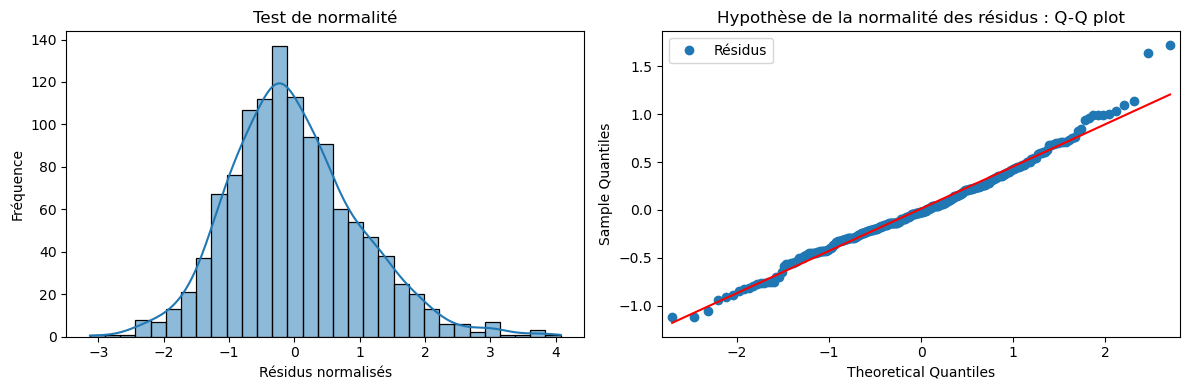

In [39]:
# Calcul des résidus : Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal

# Création d'une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Premier sous-graphique : Histogramme des résidus normalisés
sns.histplot(resid_norm, kde=True, ax=ax1)
ax1.set_title('Test de normalité')
ax1.set_xlabel('Résidus normalisés')
ax1.set_ylabel('Fréquence')

# Deuxième sous-graphique : QQ-plot des résidus
sm.qqplot(residuals, line='s', ax=ax2, label="Résidus")
ax2.set_title("Hypothèse de la normalité des résidus : Q-Q plot")
ax2.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [40]:
# test Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# test d'Anderson-Darling
anderson_test= stats.anderson(residuals, dist='norm')

# test de Kolmogorov-Smirnov
ks_test= stats.kstest(residuals,'norm')

#Tableau de résultats 
df_normality = pd.DataFrame ({
    "Test de normalité" : ["Shapiro-Wilk" , "Anderson-Darling", "Kolmogorov-Smirnov"], 
    "Statistiques":[shapiro_test.statistic,anderson_test.statistic, ks_test.statistic], 
    "P-value": [shapiro_test.pvalue ,'N/A' , ks_test.pvalue]
})
df_normality

Test de normalité  Statistiques   P-value
0        Shapiro-Wilk      0.984820  0.003436
1    Anderson-Darling      1.002979       N/A
2  Kolmogorov-Smirnov      0.218887       0.0

Les trois tests de normalité indiquent que nos données ne sont pas normalement distribuées. 

Néanmoins, le fait qu'il ne soit pas très différent d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

##### Vérification de l'autocorrélation

In [41]:
from statsmodels.stats.stattools import durbin_watson

# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Tets de Durbin-Watson : statistiques =",dw_test)

Tets de Durbin-Watson : statistiques = 1.974895669109116


La statistique de Durbin-Watson a une plage de valeurs entre 0 et 4. Une valeur proche de 2 indique généralement une absence ou une faible autocorrélation des résidus, ce qui est souhaitable dans une régression linéaire.

Dans notre cas, une statistique de Durbin-Watson de 1.98 indique qu'il y a très peu d'autocorrélation positive ou négative dans les résidus de notre modèle. Cela suggère que les résidus sont indépendants les uns des autres, ce qui est l'une des hypothèses clés de la régression linéaire multiple. Une valeur proche de 2 renforce la confiance dans les résultats de notre modèle.

##### Moyenne des termes d'erreur 

In [42]:
residuals.mean()

0.013012712917251583

La moyenne de ces résidus est une mesure de la qualité d'ajustement du modèle linéaire aux données.

Dans notre cas, une valeur moyenne des résidus d'environ 4.6e-13 indique qu'en moyenne, les résidus sont très proches de zéro. Cela suggère que le modèle linéaire explique très bien la variation dans les données, car les résidus (les erreurs) sont extrêmement petits, négligeables. C'est un résultat souhaitable en régression linéaire, car cela signifie que le modèle correspond bien aux données.

##### Vérification de l’homoscédasticité

L'homoscédasticité signifie que la variance des résidus est constante à différentes valeurs prédites, ce qui est une hypothèse importante de la régression linéaire multiple. 

Pour tester l'homoscédasticité d'un modèle de régression, nous pouvons utiliser un graphique des résidus par rapport aux valeurs prédites. 

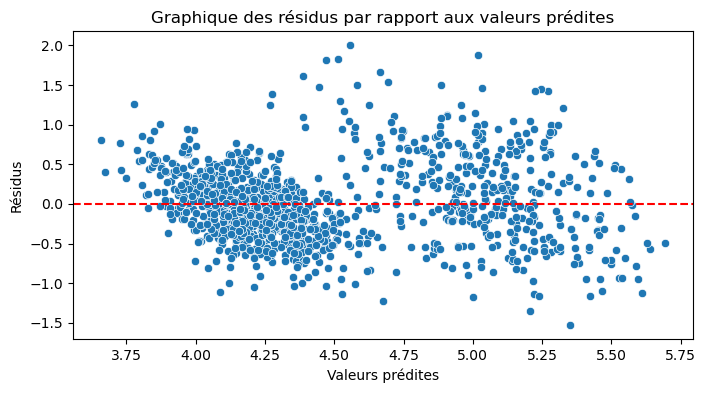

In [43]:
#Test d'homoscédasticité
# Calcul des résidus
residuals = y_train - y_train_predict

# Créez un graphique des résidus par rapport aux valeurs prédites
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_train_predict, y=residuals)
plt.title('Graphique des résidus par rapport aux valeurs prédites')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='r', linestyle='--')  # Ajoutez une ligne horizontale à y=0
plt.show()

Dans ce graphique, nous observons la dispersion des points ne change pas à mesure que les valeurs prédites changent.

L'absence de motifs particuliers, comme un élargissement ou un rétrécissement systématique des résidus à mesure que la variable dépendante change ou une structure (tendance, cône, vagues,formes d'entonnoir ou W...), est une autre indication en faveur de l'homoscédasticité.

Il est également possible de tester l'homoscédasticité des résidus, à l'aide par exemple du test de Breusch-Pagan (l'hypothèse nulle est l'homoscédasticité).

In [44]:
from statsmodels.stats.diagnostic import het_breuschpagan
exog_vars = lr_model.model.exog

# Effectuez le test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, exog_vars)

# Affichez les résultats du test
print("Test de Breusch-Pagan :")
print(f"Statistique du test : {bp_test[0]}")
print(f"P-valeur : {bp_test[1]}")
print(f"Degrés de liberté : {bp_test[2]}")
print(f"Statistiques du test LM : {bp_test[3]}")

# Interprétez les résultats en fonction de la p-valeur
if bp_test[1] < 0.05:
    print("La p-valeur est inférieure à 0.05, ce qui suggère une hétéroscédasticité significative.")
else:
    print("La p-valeur est supérieure à 0.05, ce qui suggère l'absence d'hétéroscédasticité significative.")

Test de Breusch-Pagan :
Statistique du test : 68.05254908581402
P-valeur : 5.847505968040699e-14
Degrés de liberté : 17.98661533705644
Statistiques du test LM : 2.4156724028280172e-14
La p-valeur est inférieure à 0.05, ce qui suggère une hétéroscédasticité significative.


Le graphique des résidus par rapport aux valeurs prédites suggère l'homoscédasticité et que le modèle respecte d'autres hypothèses importantes.

### 2.4 Application du modèle <a class="anchor" id="section_2_4"></a>

In [45]:
# Prédire les valeurs manquantes de marge_bas à partir de la régression linéaire
X_manquantes = donnees_manquantes[['height_left', 'height_right', 
                       'margin_up', 'length']]
X_manquantes = sm.add_constant(X_manquantes) 
y_manquantes_pred = lr_model.predict(X_manquantes)

# Mise à jour des valeurs manquantes dans le DataFrame "donnees_manquantes"
donnees_manquantes['margin_low'] = y_manquantes_pred

# Créez le DataFrame final en concaténant les données manquantes et les données complètes
data_final = pd.concat([donnees_manquantes, donnees_completes], ignore_index=True)

C:\Users\aicha\AppData\Local\Temp\ipykernel_4672\3315743892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
data_final.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [47]:
data_final.shape

(1500, 7)

In [48]:
data_final.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Nous allons comparer les moyennes de "margin_low" avant et après imputation.

In [49]:
# Billets moyens selon l'authenticite avant imputation:
mean_margin_low = data.groupby(["is_genuine"])["margin_low"].mean()

# Billets moyens selon l'authenticite après imputation:
mean_margin_low_final = data_final.groupby(["is_genuine"])["margin_low"].mean()

# Créer un DataFrame pour la comparaison
comparison_df = pd.DataFrame({
    'Authenticité': mean_margin_low.index,
    'Margin Low Avant Imputation': mean_margin_low.values,
    'Margin Low Après Imputation': mean_margin_low_final.values
})

print(comparison_df)


   Authenticité  Margin Low Avant Imputation  Margin Low Après Imputation
0             0                     5.215935                     5.213707
1             1                     4.116097                     4.118175


Les différences entre les moyennes avant et après imputation sont très faibles, ce qui indique que l'imputation n'a pas eu un impact significatif sur cette variable.

## 3 Analyse exploratoire sur la base complète <a class="anchor" id="chapter_3"></a>

In [50]:
# Billets moyens 
mean_data_final = data_final.groupby(["is_genuine"]).mean()
mean_data_final_df = pd.DataFrame(mean_data_final,columns=['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length'])
print(mean_data_final_df)

             diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
0           171.90116    104.19034     104.14362    5.213707    3.35016   
1           171.98708    103.94913     103.80865    4.118175    3.05213   

               length  
is_genuine             
0           111.63064  
1           113.20243  


Les faux billets ont en moyenne:
- diagonal plus petite
- height_left plus grande
- height_right plus grande
- margin_low plus grande
- margin_up plus grande
- length plus petite

In [51]:
# Calcul de la différence entre authenticité 0 et 1 pour chaque variable
difference = mean_data_final_df.loc[1] - mean_data_final_df.loc[0]

# Affichage des différences
print("Différences entre authenticité 0 et 1 :")
print(difference)

Différences entre authenticité 0 et 1 :
diagonal        0.085920
height_left    -0.241210
height_right   -0.334970
margin_low     -1.095532
margin_up      -0.298030
length          1.571790
dtype: float64


Il y a une différence notable des moyennes des variables 'length' et la 'margin_low' et une différence très faible des moyennes de 'diagonal' entre les deux types d'authenticité

'length' et la 'margin_low' pourraient être des caractéristique distinctives importantes à contrario de 'diagonal'.

### 3.2 Analyse des variables <a class="anchor" id="section_3_2"></a>

In [52]:
variables = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']

# Séparez les données en fonction de l'authenticité (0 et 1)
data_authenticity_0 = data_final[data_final['is_genuine'] == 0][variables]
data_authenticity_1 = data_final[data_final['is_genuine'] == 1][variables]

#### 3.2.1 Visualisation des Distributuions <a class="anchor" id="section_3_2_1"></a>

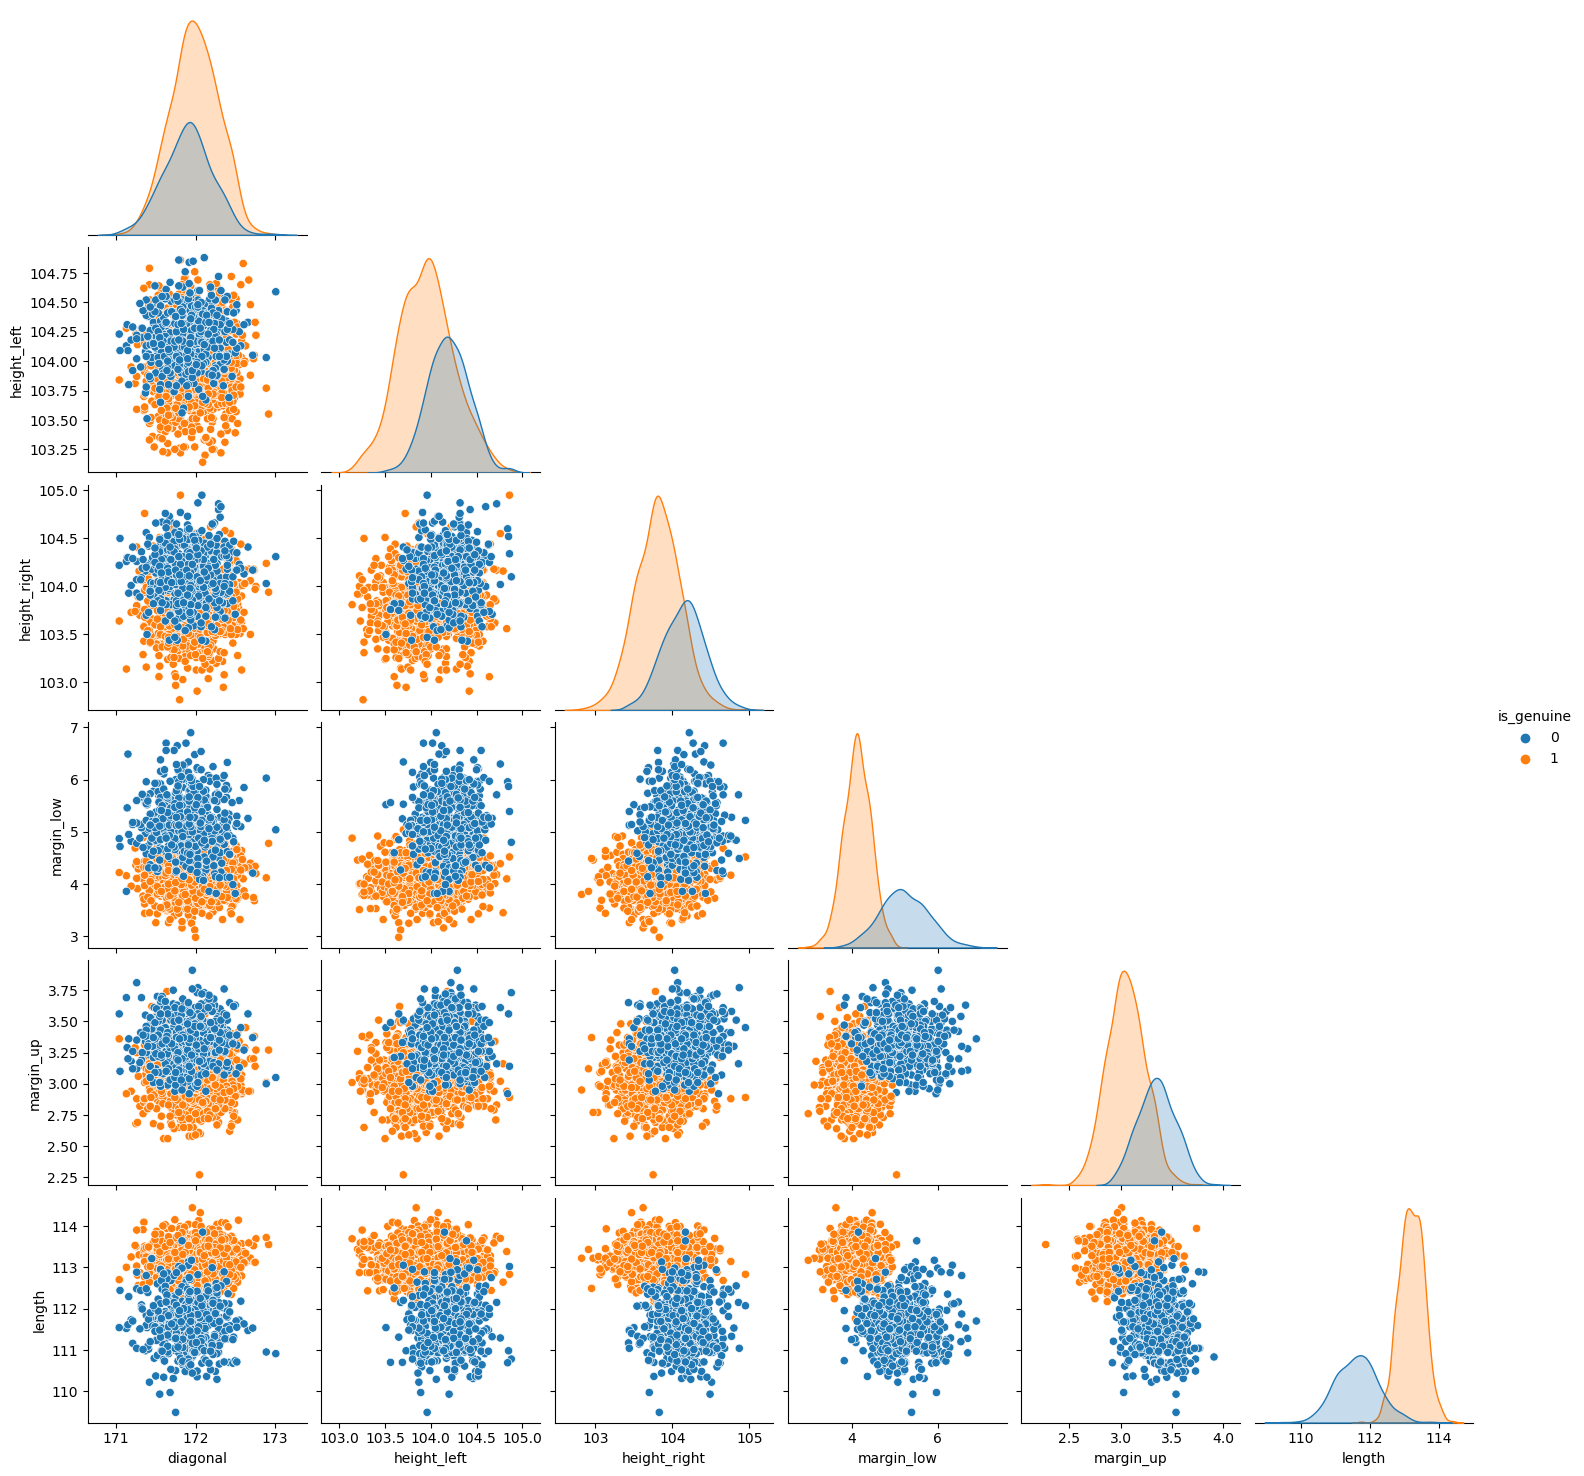

In [53]:
# Visualisation de la distribution des différentes variables selon les 2 modalités : vrais et faux billets
sns.pairplot(data_final, hue="is_genuine",corner=True)

Certains points paraissent particulièrement éloignés de leurs groupes, nous allons donc par la suite essayer d'identifier les outliers dans notre jeu de données. 

Les dimensions qui permettent vraiment de distinguer les vrais des faux billes sont 'length' et 'margin_low'. Ces variables semblent avoir des distributions distinctes entre les vrais et les faux billets, avec peu de chevauchement.

Cependant, nous allons conserver toutes les variables pour les analyses ultérieures afin d'adopter une approche plus complète.

#### 3.2.2 Test de Normalité <a class="anchor" id="section3_2_2"></a>

In [54]:
# Créez une liste pour stocker les résultats de normalité
shapiro_results = []

# Pour chaque variable, effectuez les tests de normalité pour authenticité == 0 et authenticité == 1
for variable in variables:
    # Séparez les données en fonction de l'authenticité (0 et 1)
    data_authenticity_0 = data_final[data_final['is_genuine'] == 0][variable]
    data_authenticity_1 = data_final[data_final['is_genuine'] == 1][variable]
    
    # Test de normalité Shapiro-Wilk
    shapiro_stat_0, shapiro_pvalue_0 = stats.shapiro(data_authenticity_0)
    shapiro_stat_1, shapiro_pvalue_1 = stats.shapiro(data_authenticity_1)
    
    # Stockez les résultats dans la liste
    shapiro_results.append([variable, shapiro_stat_0, shapiro_pvalue_0, shapiro_stat_1, shapiro_pvalue_1])

# Convertissez la liste en un DataFrame pandas avec des noms de colonnes
shapiro_df = pd.DataFrame(shapiro_results, columns=["Variable", "Statistique Auth 0", "P-value Auth 0", "Statistique Auth 1", "P-value Auth 1"])

# Affichez le DataFrame
shapiro_df

Variable  Statistique Auth 0  P-value Auth 0  Statistique Auth 1  \
0      diagonal            0.997436        0.638768            0.998063   
1   height_left            0.997876        0.790621            0.996581   
2  height_right            0.997990        0.826613            0.998549   
3    margin_low            0.997043        0.505006            0.998298   
4     margin_up            0.995734        0.192581            0.998158   
5        length            0.997109        0.526782            0.998049   

   P-value Auth 1  
0        0.310213  
1        0.028512  
2        0.587245  
3        0.430466  
4        0.355244  
5        0.303580

Pour le groupe avec authenticité 0, les données semblent suivre une distribution normale pour toutes les variables. 

Cependant, pour le groupe avec authenticité 1, la variable "height_left" pourrait ne pas suivre une distribution normale, bien que les autres variables semblent suivre une distribution normale (les P-values sont >0.05).

#### 3.2.3 Analyse de la Corrélation <a class="anchor" id="section_3_2_3"></a>

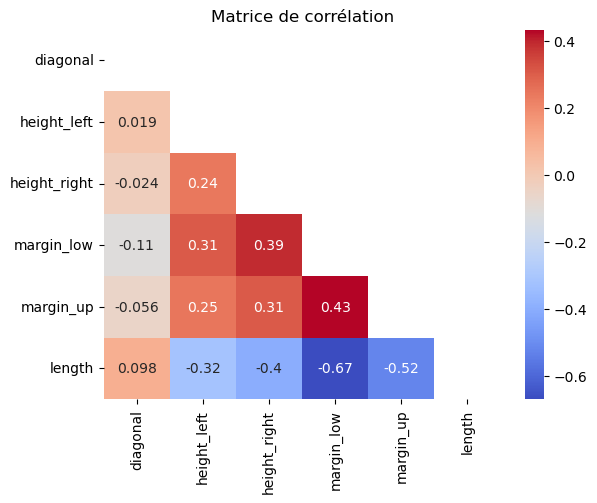

In [55]:
# Créez les matrices de corrélation
corr_matrix = data_final[variables].corr()

# Heatmap pour la matrice de corrélation de toutes les données
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  mask=np.triu(corr_matrix))
plt.title("Matrice de corrélation")

plt.show()

D'après la matrice de corrélation ci-dessus, nous pouvons voir que 'marge_bas' est le plus corrélé à 'longeur' (corrélation négative modérée -0.67).


### 3.3 Analyse des Outliers <a class="anchor" id="section_3_3"></a>

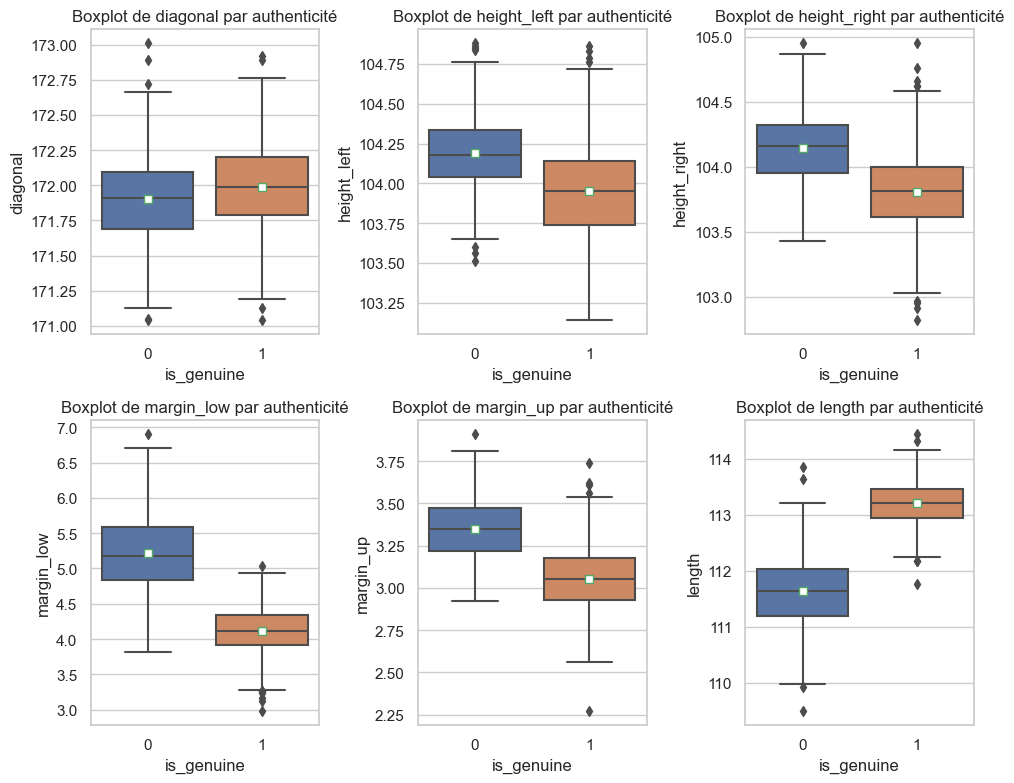

In [56]:
# Créez une liste de DataFrames à partir de chaque variable en fonction de "authenticité"
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for i, variable in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="is_genuine", y=variable, data=data_final, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
    plt.title(f'Boxplot de {variable} par authenticité')

plt.tight_layout()
plt.show()

Les boxplots nous montrent des différences de distributions, de médianes et de moyennes assez nettes entre vrais et faux billets pour chaque variable sauf pour la variable 'diagonal'.

On voit qu'il y a des outliers pour toutes les variables.
Nous ne les supprimons pas avant la régression logistique puisque nous ne savons pas comment ils se comportent, il faudra cependant faire une étude des individus atypiques et influents.

In [57]:
def detecter_outliers(variable, is_guenine):
    # Sélectionner les données en fonction de l'authenticité
    donnees = data_final[data_final['is_genuine'] == is_genuine][variable]
    
    # Calculer le premier et le troisième quartile
    Q1 = np.percentile(donnees, 25)
    Q3 = np.percentile(donnees, 75)
    
    # Calculer l'intervalle interquartile (IQR)
    IQR = Q3 - Q1
    
    # Calculer les bornes supérieures et inférieures
    borne_sup = Q3 + 1.5 * IQR
    borne_inf = Q1 - 1.5 * IQR
    
    # Identifier les outliers
    outliers_sup = donnees[donnees > borne_sup]
    outliers_inf = donnees[donnees < borne_inf]
    
    return {'borne_sup': borne_sup, 'borne_inf': borne_inf, 'outliers_sup': outliers_sup, 'outliers_inf': outliers_inf}

# Liste des variables à examiner
variables = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length'] 

# Initialiser un dictionnaire pour stocker les résultats
resultats_outliers = {}

# Parcourir chaque variable et authenticité
for variable in variables:
    for is_genuine in [0, 1]:
        key = f'{variable}_authenticite_{is_genuine}'
        resultats_outliers[key] = detecter_outliers(variable, is_genuine)

# Afficher les informations sur les outliers
for key, value in resultats_outliers.items():
    print(f'Variable: {key}')
    print(f'Borne supérieure: {value["borne_sup"]}')
    print(f'Borne inférieure: {value["borne_inf"]}')
    print(f'Outliers supérieurs:\n{value["outliers_sup"]}')
    print(f'Outliers inférieurs:\n{value["outliers_inf"]}\n')

Variable: diagonal_authenticite_0
Borne supérieure: 172.69625000000002
Borne inférieure: 171.08625
Outliers supérieurs:
1030    172.89
1282    173.01
1450    172.72
Name: diagonal, dtype: float64
Outliers inférieurs:
1148    171.04
1390    171.05
Name: diagonal, dtype: float64

Variable: diagonal_authenticite_1
Borne supérieure: 172.815
Borne inférieure: 171.175
Outliers supérieurs:
844    172.92
858    172.89
Name: diagonal, dtype: float64
Outliers inférieurs:
659    171.13
749    171.04
Name: diagonal, dtype: float64

Variable: height_left_authenticite_0
Borne supérieure: 104.77124999999998
Borne inférieure: 103.60125000000002
Outliers supérieurs:
1097    104.88
1156    104.86
1314    104.84
1384    104.85
Name: height_left, dtype: float64
Outliers inférieurs:
1090    103.60
1092    103.51
1174    103.56
Name: height_left, dtype: float64

Variable: height_left_authenticite_1
Borne supérieure: 104.74000000000001
Borne inférieure: 103.13999999999999
Outliers supérieurs:
37     104.86
5

In [58]:
# Créer d'un data sans outliers
# Collecter les indices des outliers
indices_outliers = []

for variable, resultats in resultats_outliers.items():
    indices_outliers.extend(resultats["outliers_sup"].index.tolist())
    indices_outliers.extend(resultats["outliers_inf"].index.tolist())

# Supprimer les lignes correspondantes de data_final
data_final_sans_outliers = data_final.drop(indices_outliers)

# Vérifier les premières lignes du DataFrame après suppression des outliers
data_final_sans_outliers

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0              1    171.94       103.89        103.45    4.321533       3.25   
1              1    171.93       104.07        104.18    4.389902       3.14   
2              1    172.07       103.80        104.38    4.426263       3.02   
4              1    171.83       104.14        104.06    4.623117       3.02   
6              1    171.92       103.83        103.76    4.186518       3.23   
...          ...       ...          ...           ...         ...        ...   
1495           0    171.75       104.38        104.17    4.420000       3.09   
1496           0    172.19       104.63        104.44    5.270000       3.37   
1497           0    171.80       104.01        104.12    5.510000       3.36   
1498           0    172.06       104.28        104.06    5.170000       3.46   
1499           0    171.47       104.15        103.82    4.630000       3.37   

      length  
0     112.79  
1     113.08  
2     112.93  
4     112.36  
6     113.29  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1448 rows x 7 columns]

### 3.4 Comparaison de la distribution des variables en fonction de leur authenticité  <a class="anchor" id="section_3_4"></a>

Nous souhaitons comparer les variables  en fonction de l'authenticité, c'est-à-dire si les distributions des variables  sont similaires ou différentes entre les faux et vrais billets.

Hypothèse nulle (H0) : Il n'y a pas de différence significative entre les groupes d'authenticité (faux et vrais billets) pour chaque variable étudiée. En d'autres termes, les distributions des variables sont similaires entre les faux et les vrais billets.

In [59]:
# Créez une liste pour stocker les résultats du test de Mann-Whitney Wilcoxon
mannwhitney_results = []

    # Pour chaque variable, effectuez les tests de normalité pour authenticité == 0 et authenticité == 1
for variable in variables:
    
    # Séparez les données en fonction de l'authenticité (0 et 1)
    data_authenticity_0 = data_final[data_final['is_genuine'] == 0][variable]
    data_authenticity_1 = data_final[data_final['is_genuine'] == 1][variable]
    
    # Effectuez le test de Mann-Whitney Wilcoxon
    mw_statistic, mw_pvalue = stats.mannwhitneyu(data_authenticity_0, data_authenticity_1, alternative='two-sided')
    
    # Stockez les résultats dans la liste
    mannwhitney_results.append({'Variable': variable, 'Mann-Whitney U Statistic': mw_statistic, 'P-value': mw_pvalue})

# Créez un DataFrame à partir des résultats du test de Mann-Whitney Wilcoxon
mannwhitney_df = pd.DataFrame(mannwhitney_results)

# Affichez le DataFrame des résultats du test de Mann-Whitney Wilcoxon
mannwhitney_df

Variable  Mann-Whitney U Statistic        P-value
0      diagonal                  210491.0   5.850271e-07
1   height_left                  371221.0   4.883939e-53
2  height_right                  400775.5   4.807965e-81
3    margin_low                  480261.0  2.200199e-186
4     margin_up                  436506.0  5.419133e-123
5        length                    8021.5  1.288000e-205

Les résultats des tests de Mann-Whitney Wilcoxon indiquent que les distributions des variables étudiées sont significativement différentes entre les faux et les vrais billets. 

Les variables sont significatives et contribuent à la caractérisation des différentes catégories d'authenticité.

### 3.5 Analyse en Composantes Principales (ACP)  <a class="anchor" id="section_3_5"></a>

##### Scaling (Mise à l'échelle)

Les données vont être standardisées, ce qui signifie qu'elles vont être centrées autour de zéro et mises à l'échelle de manière à avoir une moyenne de 0 et un écart type de 1 pour chaque variable. Cela permet de traiter les variables de manière équitable lors de l'analyse.

In [60]:
# Sélectionnez les variables à inclure dans l'ACP
variables = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']

# Sélectionnez les données correspondantes dans data_final
data = data_final[variables]

# Standardisez les données (centrage et mise à l'échelle)
# Calculer les moyennes et écarts types
means = data.mean(axis=0)
stds = data.std(axis=0)
# Centrage et mise à l'échelle manuels
data_scaled = (data - means) / stds

idx = ["mean", "std"]
pd.DataFrame(data_scaled).describe().round(2).loc[idx, :]

diagonal  height_left  height_right  margin_low  margin_up  length
mean       0.0          0.0           0.0         0.0        0.0    -0.0
std        1.0          1.0           1.0         1.0        1.0     1.0

##### PCA

Une ACP a été réalisée pour réduire la dimensionnalité des données.

In [61]:
# Créez un objet PCA
pca = PCA()

# Appliquez l'ACP aux données standardisées
pca.fit(data_scaled)

PCA()

Un graphique "Scree Plot" a été généré pour montrer le pourcentage d'inertie expliqué par chaque composante principale. Cela permet de déterminer combien de composantes principales sont nécessaires pour représenter efficacement les données.

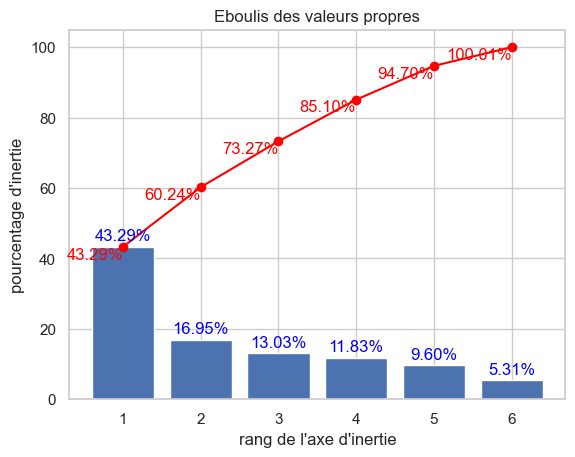

In [62]:
from Fonctions.pca import display_scree_plot
display_scree_plot(pca)

Nous obtenons 60% d'inertie expliquée avec seulement deux composantes principales, cela signifie que ces deux composantes capturent une proportion significative de la variance dans vos données

In [63]:
# importation des fonctions créées
from Fonctions.pca import correlation_graph
from Fonctions.pca import display_factorial_planes

In [64]:
#Calcul coordonnées des individus dans l'espace des composantes principales.
X_proj = pca.transform(data_scaled)

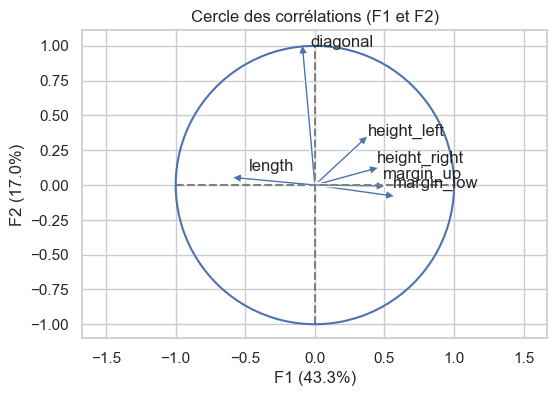

In [65]:
# Plan 1 et 2
x_y = (0, 1)

features = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']

# Plot the correlation graph in the first subplot
correlation_graph(pca, x_y, features)


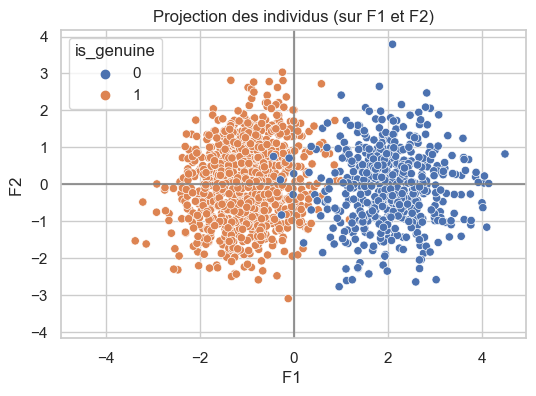

In [66]:
# Plot the factorial planes in the second subplot
display_factorial_planes(X_proj, x_y, clusters=data_final['is_genuine'])

L'observation de ce plan ACP nous montre bien visuellement la séparation entre vrais et faux billets.
Cela nous permet de confirmer les caractéristiques déjà observées entre les vrais et faux billets:
- La diagonale n'a pas d'impact entre vrais et faux billets
- Les vrais billets ont une longueur plus grande
- Les faux billets ont de plus grandes 'height_left', 'height_right','margin_low', 'margin_up'

## 4 Méthodes de classification  <a class="anchor" id="chapter4"></a>       

Les algorithmes de classification ont été effectués sur des données standardisées. Cela garantit que les variables sont mises à la même échelle.

### 4.1 Classification non supervisé: Clustering K-means  <a class="anchor" id="section_4_1"></a>   

K-means est un algorithme de clustering non supervisé qui vise à diviser un ensemble de données en K groupes (ou clusters) distincts. Il fonctionne en itérant à travers les données et en assignant chaque point de données au cluster dont le centroïde (le centre du groupe) est le plus proche. Ensuite, il calcule un nouveau centroïde pour chaque cluster en prenant la moyenne des points de données qui lui sont attribués. Ce processus est répété jusqu'à ce que les centroïdes convergent vers une position stable.

#### 4.1.1 Évaluation du Nombre Optimal de Clusters et Coefficient de Silhouette <a class="anchor" id="section_4_1_1"></a>

C:\Users\aicha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



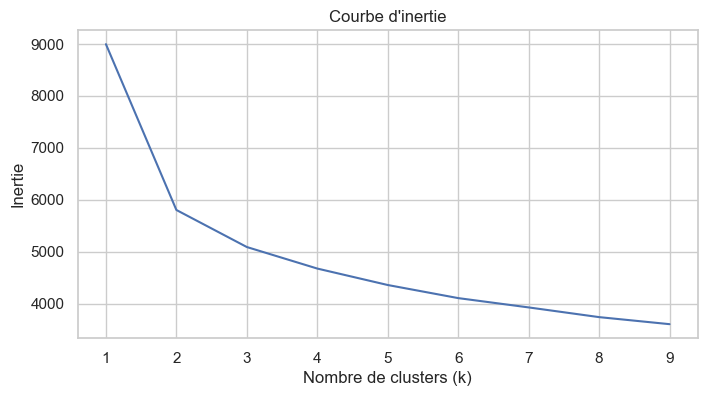

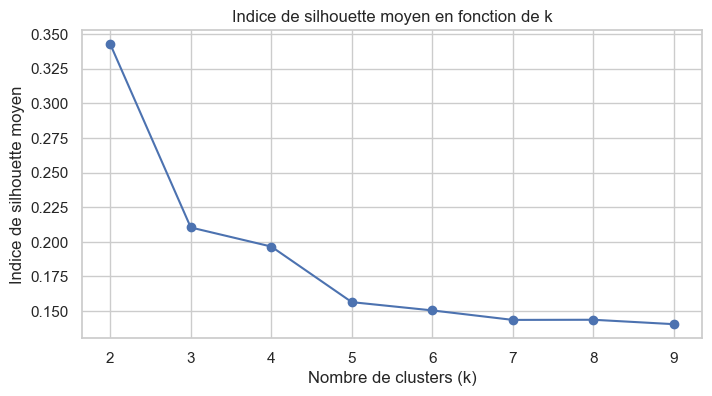

In [67]:
from Fonctions.kmeans import plot_inertia,plot_silhouette_avg

# Utilisation des fonctions
plot_inertia(data_scaled)
plot_silhouette_avg(data_scaled)

La courbe d'inertie a été tracée pour aider à déterminer le nombre optimal de clusters. Il est généralement choisi à l'endroit où l'inertie commence à diminuer fortement.

La méthode du coude nous permet de choisir une valeur de k=2 confirmé par la courbe de l'indice de silouhette moyen en fonction de k.

In [68]:
# Créez un modèle K-Means avec 2 clusters
k = 2
kmeans = KMeans(n_clusters=k, random_state=42) 

# Ajustez le modèle aux données standardisées
kmeans.fit(data_scaled)

# Obtenir les étiquettes de cluster pour chaque point de données
cluster_labels = kmeans.labels_

# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Créez une nouvelle colonne dans le DataFrame data_initial pour stocker les étiquettes de cluster
data_cluster = data_final.copy()
data_cluster['Cluster Kmeans'] = cluster_labels

#### Coefficient de silhouette

In [69]:
from sklearn.metrics import silhouette_score

# Calculer le coefficient de silhouette
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

# Afficher le coefficient de silhouette moyen
print(f"Le coefficient de silhouette moyen pour les {k} clusters est : {silhouette_avg}")

Le coefficient de silhouette moyen pour les 2 clusters est : 0.3427061744800319


#### 4.1.2 Analyse et Interprétation des Clusters K-means <a class="anchor" id="section_4_1_2"></a>

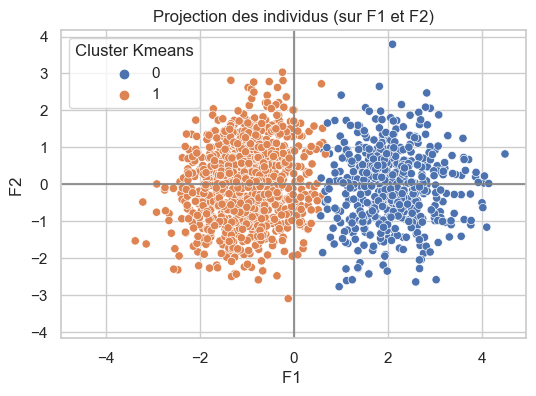

In [70]:
x_y = [0,1]
x, y = 0, 1
display_factorial_planes(X_proj, x_y, clusters=data_cluster['Cluster Kmeans'])

Le premier cluster semble correspondre aux faux billets pendant que le second correspond plus aux vrais billets.

Cluster Kmeans    0    1
is_genuine              
0               486   14
1                10  990


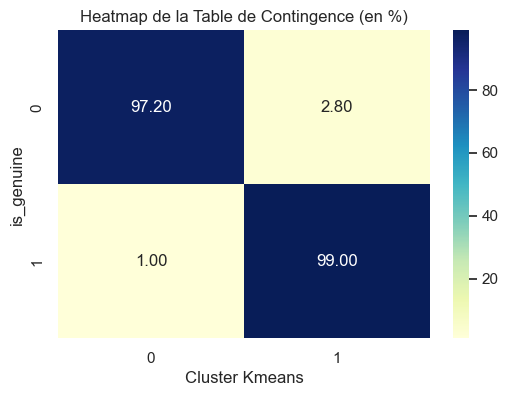

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Créez une table de contingence
contingency_table = pd.crosstab(data_cluster['is_genuine'], data_cluster['Cluster Kmeans'])
# Affichez la table de contingence
print(contingency_table)

# Créez une table de contingence avec des pourcentages
contingency_table2 = pd.crosstab(data_cluster['is_genuine'], data_cluster['Cluster Kmeans'], normalize='index') * 100
contingency_table2 = contingency_table2.round(2)

# Créez le heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table2, annot=True, fmt=".2f", cmap="YlGnBu")

# Ajoutez des titres et des étiquettes
plt.title('Heatmap de la Table de Contingence (en %)')
plt.xlabel('Cluster Kmeans')
plt.ylabel('is_genuine')

# Affichez le heatmap
plt.show()


Les résultats du premier algorithme K-means sont très prometteurs. Avec un taux de vrais positifs de 99% et de vrais négatifs de 97.2%, l'algorithme a démontré une capacité exceptionnelle à distinguer les billets authentiques des faux.
Bien que l'algorithme ait montré une excellente performance, il est important de noter qu'il y a quelques faux négatifs (1.0%) et faux positifs (2.8%).

Nous allons maintenant visualiser le Radar Plot des Clusters K-means afin de visualiser les différences entre les clusters en termes de caractéristiques.

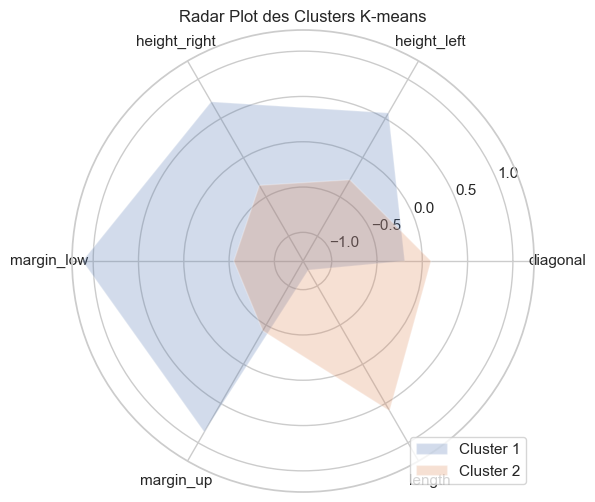

In [72]:
from Fonctions.kmeans import plot_radar_kmeans

# Caractéristiques (ou dimensions) sur le radar plot
features = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']
plot_radar_kmeans(kmeans, features)


Nous observons les caractéristiques suivantes:

- Pas de différence importante de diagonale entre vrais et faux billets
- Les vrais billets ont une longueur plus grande
- Les faux billets ont de plus grandes 'height_left', 'height_right','margin_low', 'margin_up'
    

#### 4.1.3 Performance du modèle <a class="anchor" id="section_4_1_3"></a>

**TP :** Vrais Positifs, le modèle a correctement prédit les échantillons positifs.

**TN :** Vrais Négatifs, le modèle a correctement prédit les échantillons négatifs.

**FP :** Faux Positifs, le modèle a incorrectement prédit les échantillons comme positifs.

**FN :** Faux Négatifs, le modèle a incorrectement prédit les échantillons comme négatifs.

**Accuracy (Exactitude)**: C'est la proportion totale de prédictions correctes. Elle mesure la capacité du modèle à prédire correctement les deux classes (positives et négatives). La formule est : Accuracy = (TP+TN)/total

**Precision (Précision)**: C'est le ratio de vrais positifs sur le total des prédictions positives. Elle mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle. La formule est : Precision = TP/TP+FP

**Recall (rappel)**: C'est la capacité du modèle à identifier tous les échantillons positifs. Un Recall élevé indique qu'il y a peu de faux négatifs. La formule est : Recall = TP/(TP+FN)

**F1 score** : C'est la moyenne harmonique de la précision et du rappel. Il donne une mesure de la performance globale du modèle en tenant compte à la fois des faux positifs et des faux négatifs. La formule est : F1 Score = 2(Recall Precision) / (Recall + Precision)

**AUC-ROC** : L'aire sous la courbe ROC mesure la capacité du modèle à distinguer entre les classes positives et négatives. Une valeur élevée indique une meilleure performance du modèle.

In [73]:
from Fonctions.projet_10 import split_data,scale_data,add_constant,train_logistic_regression,create_variable_names_df,predict_logistic_regression, evaluate_performance, calculate_roc_metrics, plot_roc_curve

              Méthode  Accuracy  Précision  Rappel    AUC  F1 Score
0  Clustering K-means     0.984   0.986056    0.99  0.981  0.988024


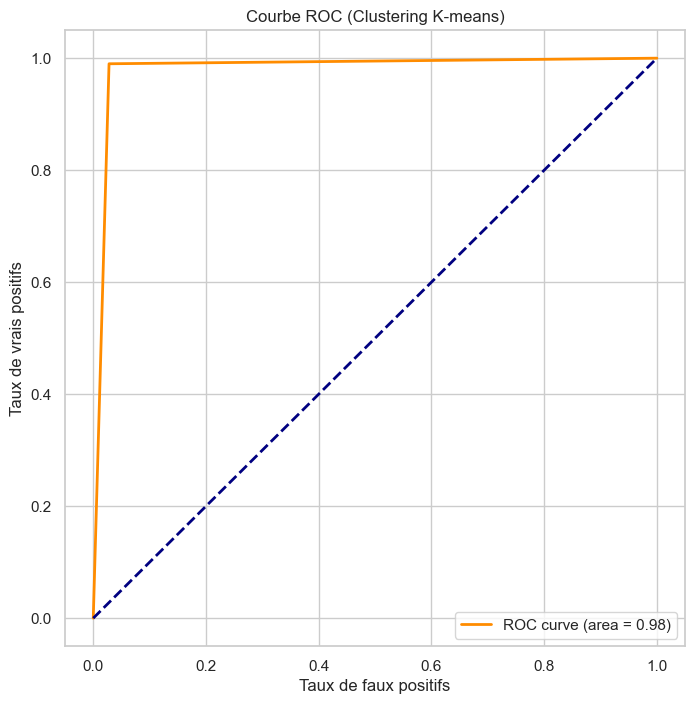

In [74]:
# Obtenir les étiquettes réelles
y_true = data_final['is_genuine']

# Calculer les prédictions du modèle
y_pred_kmeans = data_cluster['Cluster Kmeans']

# Calculer l'exactitude, la précision et le rappel
performances_kmeans = evaluate_performance(y_true, y_pred_kmeans, 'Clustering K-means')

# Calculer la courbe ROC et l'aire sous la courbe (AUC)
fpr_kmeans, tpr_kmeans, thresholds, roc_auc_kmeans = calculate_roc_metrics(y_true, y_pred_kmeans)

# Créer un DataFrame avec les métriques
metrics_Kmeans = {
    'Méthode': 'Clustering K-means',
    'Accuracy': performances_kmeans['Exactitude'][0],
    'Précision': performances_kmeans['Précision'][0],
    'Rappel': performances_kmeans['Rappel'][0],
    'AUC': roc_auc_kmeans,
    'F1 Score': performances_kmeans['F1 Score'][0]
}

df_Kmeans = pd.DataFrame(metrics_Kmeans, index=[0])

# Afficher le tableau
print(df_Kmeans)

# Tracé de la courbe ROC pour K-means
plot_roc_curve(fpr_kmeans, tpr_kmeans, roc_auc_kmeans, 'Clustering K-means')

##### Valisation croisée

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble des données
X_total = data_final.drop(['is_genuine'], axis=1)
y_total = data_final['is_genuine']

# Calculer les moyennes et écarts types
means = X_total.mean(axis=0)
stds = X_total.std(axis=0)

# Standardisez les données (centrage et mise à l'échelle)
X_total = (X_total - means) / stds

# Effectuer la validation croisée et obtenir les prédictions des clusters
cluster_labels_cv = cross_val_predict(kmeans, X_total, y_total, cv=5)

# Afficher l'accuracy pour chaque fold
cv_scores = cross_val_score(kmeans, X_total, y_total, cv=5, scoring='accuracy')
print("Accuracies pour chaque fold:", cv_scores)
print(f"Accuracy moyenne: {np.mean(cv_scores):.2f}")

Accuracies pour chaque fold: [0.99       0.99666667 0.98666667 0.97333333 0.98333333]
Accuracy moyenne: 0.99


#### 4.1.4 Application sur des donnes inconnues <a class="anchor" id="section_4_1_4"></a>

In [76]:
# Charger les nouvelles données à partir du fichier CSV
billets_production = pd.read_csv('billets_production2.csv', sep=',')

test = billets_production.copy()

# Sélectionner les colonnes pour les caractéristiques
features = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

# Sélectionner les données de test
x_test = test[features]

# Standardiser les données
x_test = (x_test - means) / stds

# Utilisez les centroïdes du modèle K-Means existant
centroids = kmeans.cluster_centers_

# Calculer les distances entre les données de test et les centroïdes
distances = np.linalg.norm(x_test.values[:, np.newaxis] - centroids, axis=2)

# Attribuer les étiquettes de cluster en fonction de la proximité avec les centroïdes
test["cluster_pred"] = np.argmin(distances, axis=1)

# Rajouter une colonne 'identification'
test['identification'] = ['vrai' if i == 1 else 'faux' for i in test['cluster_pred']]

# Affichage des résultats
print(test[["id", "cluster_pred","identification"]])
        
# Afficher le compte de vrais et faux
print("\nCompte des billets identifiés:")
compte_identifications = test["cluster_pred"].value_counts()
        
for label, count in compte_identifications.items():
    print(f"Nombre de billets identifiés comme {'vrai' if label == 1 else 'faux'} : {count}")

    id  cluster_pred identification
0  A_1             0           faux
1  A_2             0           faux
2  A_3             0           faux
3  A_4             1           vrai
4  A_5             1           vrai

Compte des billets identifiés:
Nombre de billets identifiés comme faux : 3
Nombre de billets identifiés comme vrai : 2


### 4.2 Algorithmes de classification supervisé <a class="anchor" id="section_4_2"></a>

Nous allons utiliser deux algorithmes de classification supervisé, le k-NN (k plus proches voisins) et la régression logistique, pour créer un modèle prédictif qui explique la variable binaire "is_guenine" en fonction de vos variables quantitatives:
- k-NN (k plus proches voisins)
- régression logistique. 

#### 4.2.1 Algorithme: k-NN ( k Nearest Neighbors) <a class="anchor" id="section_4_2_1"></a>

Il est surnommé « nearest neighbors » (plus proches voisins, en français) car le principe de ce modèle consiste en effet à choisir les k données les plus proches du point étudié afin d’en prédire sa valeur.

Pour classer un nouvel échantillon, il examine les k voisins les plus proches dans l'ensemble d'entraînement et attribue la classe majoritaire parmi ces voisins au nouvel échantillon. 

##### 4.2.1.1 Préparation des Données <a class="anchor" id="section_4_2_1_1"></a>

#### Division des Données 

In [77]:
from sklearn.model_selection import train_test_split

#Diviser les données complètes en ensemble d'apprentissage et en test
train, test = train_test_split(data_final, test_size=0.2, random_state=42)

In [78]:
# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble d'entraînement
X_train = train.drop(['is_genuine'], axis=1)
y_train = train['is_genuine']

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble de test
X_test = test.drop(['is_genuine'], axis=1)
y_test = test['is_genuine']

#### Normalisation des Données 

Normalisez vos variables quantitatives pour vous assurer que chaque dimension a une influence comparable.

In [79]:
# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

# Centrage et mise à l'échelle manuels
X_train = (X_train - means) / stds
X_test = (X_test - means) / stds

#### 4.2.1.2 Choix du Paramètre k <a class="anchor" id="section_4_2_1_2"></a>

Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 2 à 15, mesurer l’erreur test et afficher la performance en fonction de k :

On peut créer un premier classifieur 3-NN, c'est-à-dire qui prend en compte les 3 plus proches voisins pour la classification.


In [80]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Testons à présent l’erreur de notre classifieur. La méthode  score  effectue exactement ça : tester les performances de prédiction d'un classifieur dans lequel on passe un jeu de données annoté — dans notre cas le jeu de données de test. Il renvoie ainsi le pourcentage de prédiction véridique trouvée par le classifieur.

In [81]:
error = 1 - knn.score(X_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.010000


Le k (nombre de voisins) est l'hyper-paramètre que l’on va chercher à optimiser pour minimiser l’erreur sur les données test.

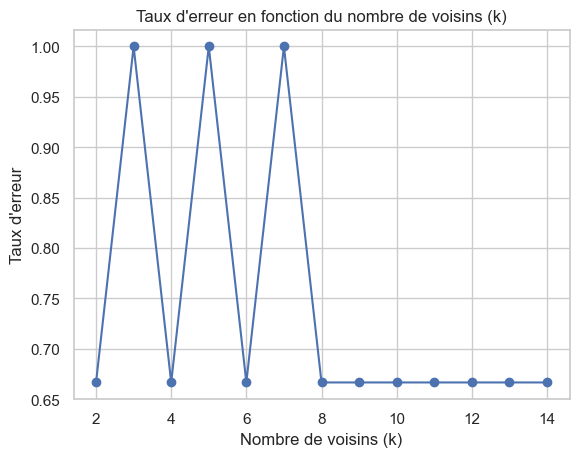

In [82]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel("Taux d'erreur")
plt.title("Taux d'erreur en fonction du nombre de voisins (k)")
plt.show()

Nous observons ici que l'erreur est minimisée pour les valeurs de k égales à 2, 4, 6 ou 8.

Nous allons Utiliser la validation croisée pour évaluer les performances du modèle avec différents k et choisir celui qui donne les meilleures performances sur l'ensemble de validation.

Nous utilisons cross_val_score pour effectuer une validation croisée à 5 plis pour chaque valeur de k que vous souhaitez tester. Nous stockons ensuite les scores moyens de validation croisée dans cv_scores. Le meilleur k est choisi en fonction du score de validation croisée le plus élevé.

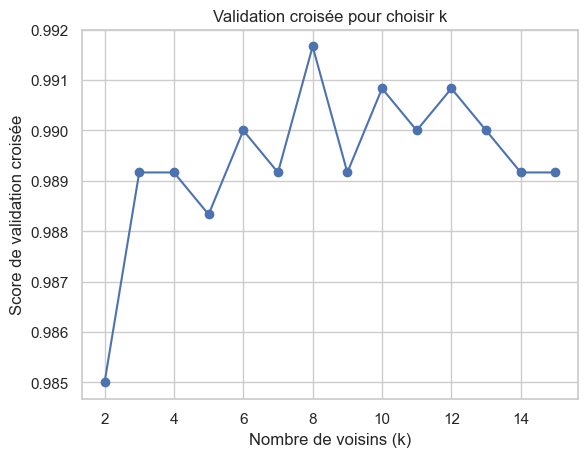

Le meilleur k est 8 avec un score de validation croisée de 0.9916666666666668


In [83]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Liste des valeurs de k que vous souhaitez tester
k_values = range(2, 16)

# Liste pour stocker les scores de validation croisée
cv_scores = []

for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # Utilisez cv=5 pour une validation croisée à 5 plis
    cv_scores.append(scores.mean())

# Trouver la meilleure valeur de k avec le score le plus élevé
best_k = k_values[cv_scores.index(max(cv_scores))]

# Afficher les scores de validation croisée pour chaque k
plt.plot(k_values, cv_scores, 'o-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour choisir k')
plt.show()

print(f"Le meilleur k est {best_k} avec un score de validation croisée de {max(cv_scores)}")

#### 4.2.1.3 Entraînement du Modèle <a class="anchor" id="section_4_2_1_3"></a>

In [84]:
# afficher les prédictions du classifieur sur quelques données
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(8)
knn.fit(X_train, y_train)

# On récupère les prédictions sur les données test
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)

    Prédit 0  Prédit 1
 0       108         2
 1         0       190


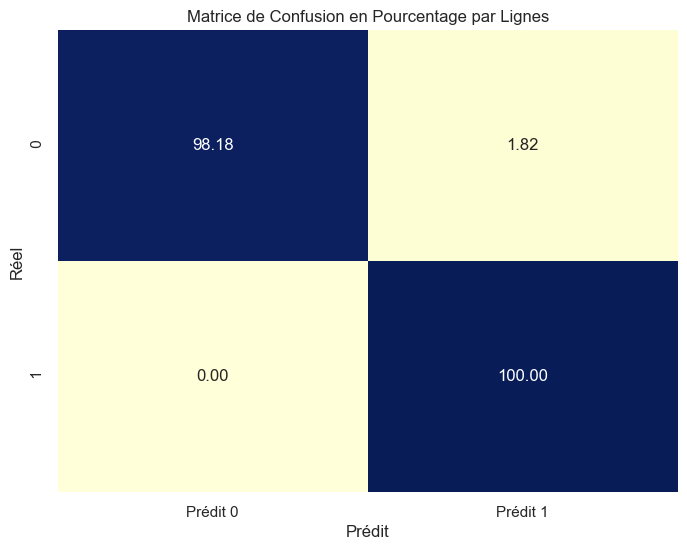

In [85]:
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_test, y_test_pred_knn)

# Créez un DataFrame Pandas pour afficher la matrice de confusion
confusion_knn = pd.DataFrame(confusion_knn, columns=[f'Prédit {i}' for i in range(confusion_knn.shape[1])],
                            index=[f' {i}' for i in range(confusion_knn.shape[0])])

# Affichez le tableau
print(confusion_knn)

# Calcul de la matrice de confusion en pourcentages par lignes
confusion_knn_pct = confusion_knn.astype('float') / confusion_knn.sum(axis=1)[:, np.newaxis] * 100

# Créez un DataFrame Pandas pour afficher la matrice de confusion en pourcentages
confusion_knn_pct = pd.DataFrame(confusion_knn_pct, columns=[f'Prédit {i}' for i in range(confusion_knn_pct.shape[1])],
                                index=[f' {i}' for i in range(confusion_knn_pct.shape[0])])


# Créez le heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn_pct, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title('Matrice de Confusion en Pourcentage par Lignes')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Le modèle basé sur l'algorithme k-NN a également obtenu des résultats remarquables. Avec un taux de détection de 100% pour les billets authentiques et de 98% pour les faux billets.
Nous notons également un faible pourcentage de faux positifs (1.8%). 

#### 4.2.1.4 Performances du modèle <a class="anchor" id="section_4_2_1_4"></a>

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_classification_report_knn = classification_report(y_train, y_train_pred_knn)
test_classification_report_knn = classification_report(y_test, y_test_pred_knn)

# Affichez les rapports de classification pour l'ensemble d'entraînement
print("Classification Report on Train Set:\n", train_classification_report_knn)

# Affichez les rapports de classification pour l'ensemble de test
print("Classification Report on Test Set :\n", test_classification_report_knn)

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       390
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

Classification Report on Test Set :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [87]:
# Calculer les prédictions du modèle
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

# Calculer les métriques ROC
fpr_test, tpr_test, _, roc_auc_test = calculate_roc_metrics(y_test, y_test_pred_knn)
fpr_train, tpr_train, _, roc_auc_train = calculate_roc_metrics(y_train, y_train_pred_knn)
fpr_knn, tpr_knn, _, roc_auc_knn = fpr_test, tpr_test, _, roc_auc_test

# Calculer les performances
train_metrics = evaluate_performance(y_train, y_train_pred_knn, 'Entraînement')
test_metrics = evaluate_performance(y_test, y_test_pred_knn, 'Test')

# Créez df avec les métriques 
metrics_knn = {
    'Méthode': 'knn',
    'Accuracy': test_metrics.loc[0, 'Exactitude'],
    'Précision': test_metrics.loc[0, 'Précision'],
    'Rappel': test_metrics.loc[0, 'Rappel'],
    'AUC': roc_auc_test,
    'F1 Score': test_metrics.loc[0, 'F1 Score']
}
                                  
df_knn = pd.DataFrame(metrics_knn, index=[0])

# Ajouter à votre DataFrame
metrics_knn = pd.DataFrame({
    'Métrique': ['AUC', 'Accuracy', 'Précision', 'Recall', 'F1 Score'],
    'Entraînement': [roc_auc_train, train_metrics.loc[0, 'Exactitude'], train_metrics.loc[0, 'Précision'],
                     train_metrics.loc[0, 'Rappel'], train_metrics.loc[0, 'F1 Score']],
    'Test': [roc_auc_test, test_metrics.loc[0, 'Exactitude'], test_metrics.loc[0, 'Précision'],
              test_metrics.loc[0, 'Rappel'], test_metrics.loc[0, 'F1 Score']]
})

# Afficher le tableau
print(metrics_knn)

    Métrique  Entraînement      Test
0        AUC      0.989174  0.990909
1   Accuracy      0.991667  0.993333
2  Précision      0.991400  0.989583
3     Recall      0.996296  1.000000
4   F1 Score      0.993842  0.994764


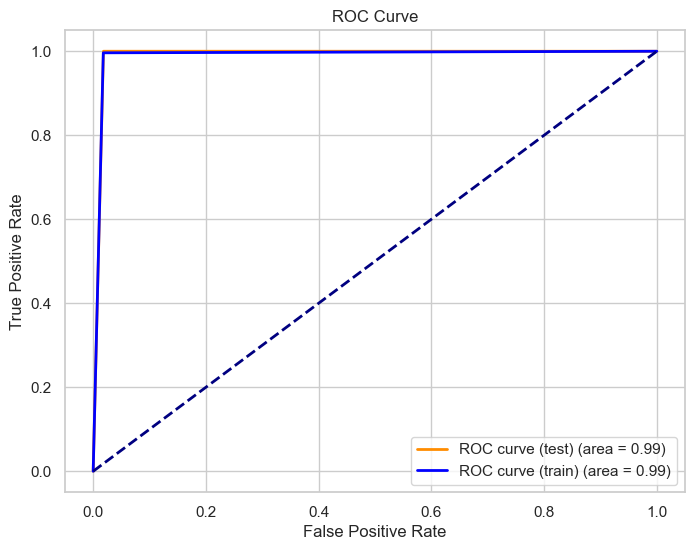

In [88]:
# Plot des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (test) (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train) (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()


##### Validation croisée 

Pour obtenir une évaluation plus robuste de votre modèle, nous allons utiliser la validation croisée. 
Nous allons diviser nos données en 5 ensembles et calculer la performance moyenne sur ces ensembles.

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble des données
X_total = data_final.drop(['is_genuine'], axis=1)
y_total = data_final['is_genuine']

# Calculer les moyennes et écarts types
means = X_total.mean(axis=0)
stds = X_total.std(axis=0)

# Standardisez les données (centrage et mise à l'échelle)
X_total = (X_total - means) / stds

scores = cross_val_score(knn, X_total, y_total, cv=5, scoring='accuracy')
print("Accuracies pour chaque fold:", scores)
print(f"Accuracy moyenne: {np.mean(scores):.2f}")

Accuracies pour chaque fold: [0.98333333 0.98666667 1.         0.99       0.99333333]
Accuracy moyenne: 0.99


In [90]:
import joblib

# Enregistrez le modèle
joblib.dump(knn, 'modele_knn.pkl')

['modele_knn.pkl']

#### 4.2.1.5 Impact des outliers <a class="anchor" id="section_4_2_1_5"></a>

##### Division et normalisation des Données sans outliers

In [91]:
# Diviser les données complètes en ensemble d'apprentissage et en test
train_sans_outliers, test_sans_outliers = train_test_split(data_final_sans_outliers, test_size=0.2, random_state=42)

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble d'entraînement
X_train_sans_outliers = train_sans_outliers.drop(['is_genuine'], axis=1)
y_train_sans_outliers = train_sans_outliers['is_genuine']

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble de test
X_test_sans_outliers = test_sans_outliers.drop(['is_genuine'], axis=1)
y_test_sans_outliers = test_sans_outliers['is_genuine']

means_sans_outliers = X_train_sans_outliers.mean(axis=0)
stds_sans_outliers = X_train_sans_outliers.std(axis=0)

# Centrage et mise à l'échelle manuels
X_train_sans_outliers = (X_train_sans_outliers - means_sans_outliers) / stds_sans_outliers
X_test_sans_outliers = (X_test_sans_outliers - means_sans_outliers) / stds_sans_outliers

##### Entraînement du modèle K-NN sans outliers

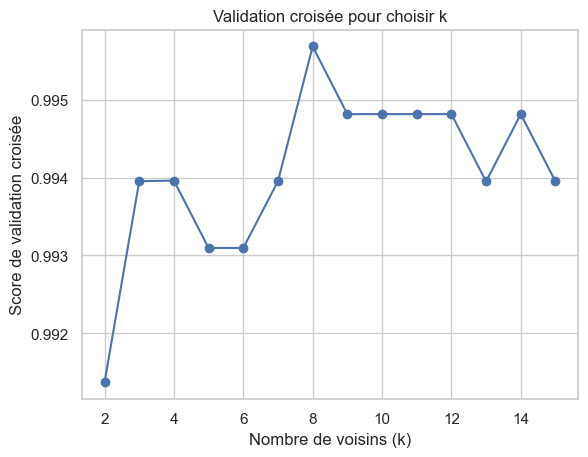

Le meilleur k est 8 avec un score de validation croisée de 0.9956859232721301


In [92]:
#Entraînement du modèle K-NN
knn_sans_outliers = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_sans_outliers.fit(X_train_sans_outliers, y_train_sans_outliers)

# Liste des valeurs de k que vous souhaitez tester
k_values = range(2, 16)

# Liste pour stocker les scores de validation croisée
cv_scores = []

for k in k_values:
    knn_sans_outliers = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_sans_outliers, X_train_sans_outliers, y_train_sans_outliers, cv=5)  # Utilisez cv=5 pour une validation croisée à 5 plis
    cv_scores.append(scores.mean())

# Trouver la meilleure valeur de k avec le score le plus élevé
best_k = k_values[cv_scores.index(max(cv_scores))]

# Afficher les scores de validation croisée pour chaque k
plt.plot(k_values, cv_scores, 'o-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour choisir k')
plt.show()

print(f"Le meilleur k est {best_k} avec un score de validation croisée de {max(cv_scores)}")

In [93]:
# On récupère le classifieur le plus performant
knn_sans_outliers = neighbors.KNeighborsClassifier(8)
knn_sans_outliers.fit(X_train_sans_outliers, y_train_sans_outliers)

# Calculer les prédictions du modèle sans outliers
y_train_pred_knn_sans_outliers = knn_sans_outliers.predict(X_train_sans_outliers)
y_test_pred_knn_sans_outliers = knn_sans_outliers.predict(X_test_sans_outliers)

# Calculer les métriques ROC
fpr_test, tpr_test, _, roc_auc_test = calculate_roc_metrics(y_test_sans_outliers, y_test_pred_knn_sans_outliers)
fpr_train, tpr_train, _, roc_auc_train = calculate_roc_metrics(y_train_sans_outliers, y_train_pred_knn_sans_outliers)
fpr_knn, tpr_knn, _, roc_auc_knn = fpr_test, tpr_test, _, roc_auc_test

# Calculer les performances
train_metrics_sans_outliers = evaluate_performance(y_train_sans_outliers, y_train_pred_knn_sans_outliers, 'Entraînement _sans_outliers')
test_metrics_sans_outliers = evaluate_performance(y_test_sans_outliers, y_test_pred_knn_sans_outliers, 'Test _sans_outliers')

# Créez df avec les métriques 
metrics_knn_sans_outliers = {
    'Méthode': 'knn_sans_outliers',
    'Accuracy': test_metrics.loc[0, 'Exactitude'],
    'Précision': test_metrics.loc[0, 'Précision'],
    'Rappel': test_metrics.loc[0, 'Rappel'],
    'AUC': roc_auc_test,
    'F1 Score': test_metrics.loc[0, 'F1 Score']
}
                                  
df_knn_sans_outliers = pd.DataFrame(metrics_knn_sans_outliers, index=[0])

# Ajouter à votre DataFrame
metrics_knn_sans_outliers = pd.DataFrame({
    'Métrique': ['AUC', 'Accuracy', 'Précision', 'Recall', 'F1 Score'],
    'Entraînement_sans_outliers': [roc_auc_train, train_metrics.loc[0, 'Exactitude'], train_metrics.loc[0, 'Précision'],
                     train_metrics.loc[0, 'Rappel'], train_metrics.loc[0, 'F1 Score']],
    'Test_sans_outliers': [roc_auc_test, test_metrics.loc[0, 'Exactitude'], test_metrics.loc[0, 'Précision'],
              test_metrics.loc[0, 'Rappel'], test_metrics.loc[0, 'F1 Score']]
})

# Comparaison des performances du modèle avec et sans outliers
# Fusionner les DataFrames en utilisant la colonne "Métrique"
merged_metrics = pd.merge(metrics_knn, metrics_knn_sans_outliers, on='Métrique', suffixes=('_avec_outliers', '_sans_outliers'))

# Afficher le DataFrame fusionné
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(merged_metrics)

    Métrique  Entraînement  Test  Entraînement_sans_outliers  \
0        AUC         0.989 0.991                       0.993   
1   Accuracy         0.992 0.993                       0.992   
2  Précision         0.991 0.990                       0.991   
3     Recall         0.996 1.000                       0.996   
4   F1 Score         0.994 0.995                       0.994   

   Test_sans_outliers  
0               0.990  
1               0.993  
2               0.990  
3               1.000  
4               0.995  


Les performances du modèle sont similaires avec et sans outliers, cela suggère que les outliers n'ont pas d'impact significatif sur le modèle.

#### 4.2.1.6 Application sur des donnes inconnues <a class="anchor" id="section_4_2_1_6"></a>

In [94]:
# Charger les nouvelles données à partir du fichier CSV
test = pd.read_csv('billets_production2.csv', sep=',')
test

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [95]:
# Charger le modèle
modele_knn = joblib.load('modele_knn.pkl')

In [96]:
# Sélectionner les colonnes pour les caractéristiques
features = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

# Sélectionner les données de test
x_test = test[features]

# Standardiser les données
x_test = (x_test - means) / stds

# Faire des prédictions sur les données de test
test["cluster_pred"] = modele_knn.predict(x_test)

# Rajouter une colonne 'identification'
test['identification'] = ['vrai' if i == 1 else 'faux' for i in test['cluster_pred']]

# Affichage des résultats
print(test[["id", "cluster_pred","identification"]])
        
# Afficher le compte de vrais et faux
print("\nCompte des billets identifiés:")
compte_identifications = test["cluster_pred"].value_counts()
        
for label, count in compte_identifications.items():
    print(f"Nombre de billets identifiés comme {'vrai' if label == 1 else 'faux'} : {count}")


    id  cluster_pred identification
0  A_1             0           faux
1  A_2             0           faux
2  A_3             0           faux
3  A_4             1           vrai
4  A_5             1           vrai

Compte des billets identifiés:
Nombre de billets identifiés comme faux : 3
Nombre de billets identifiés comme vrai : 2


### 4.2.2 Régression logistique <a class="anchor" id="section_4_2_2"></a>

La régression logistique binaire est une technique qui modélise la probabilité d'appartenance à une catégorie binaire en utilisant une fonction logistique (ou sigmoïde) pour modéliser la probabilité d'appartenance à une certaine catégorie (1 ou 0).

#### 4.2.2.1 Préparation des Données <a class="anchor" id="section_4_2_2_1"></a>

In [97]:
from sklearn.model_selection import train_test_split

#Diviser les données complètes en ensemble d'apprentissage et en test
train, test = train_test_split(data_final, test_size=0.2, random_state=42)

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble d'entraînement
X_train = train.drop(['is_genuine'], axis=1)
y_train = train['is_genuine']

# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble de test
X_test = test.drop(['is_genuine'], axis=1)
y_test = test['is_genuine']

# Extraire les noms des variables à partir de X_train (avant la mise à l'échelle)
variable_names = X_train.columns[0:]

# Standardisez les données (centrage et mise à l'échelle)
# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

# Centrage et mise à l'échelle manuels
X_train = (X_train - means) / stds
X_test = (X_test - means) / stds

#### 4.2.2.2 Entraînement du Modèle <a class="anchor" id="section_4_2_2_2"></a>

Nous allons sélectionner les variables significatives avec scikit-learn.

In [98]:
# Importez les bibliothèques nécessaires
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Ajoutez une constante (terme d'interception) à X_train
X_train = sm.add_constant(X_train)

# Résumé du modèle avec statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

# Afficher les noms des variables
print("Noms des variables:")
for i, name in enumerate(variable_names):
    print(f"x{i+1}: {name}")

Optimization terminated successfully.
         Current function value: 0.026746
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1193
Method:                           MLE   Df Model:                            6
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9576
Time:                        21:33:26   Log-Likelihood:                -32.095
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                5.366e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5248      0.438      5.764      0.000       1.666       3.383
diagonal        -0.057

On constate que "diagonal" est la variable la moins significative. On l'enlève donc et on relance la régression.

In [99]:
# Utilisation des fonctions
features_to_drop = ['is_genuine', 'diagonal']

# Diviser les données
X_train, y_train, X_test, y_test, variable_names = split_data(data_final, features_to_drop)

# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

# Ajouter la constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle de régression logistique
result = train_logistic_regression(X_train_const, y_train)

# Afficher les noms des variables
variable_names_df = create_variable_names_df(variable_names)

# Afficher le résumé du modèle
print(result.summary())
print(variable_names_df)

Optimization terminated successfully.
         Current function value: 0.026755
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9576
Time:                        21:33:26   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                3.030e-311
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5203      0.436      5.777      0.000       1.665       3.375
height_left     -0.483

On constate que "height_left" est la variable la moins significative. On l'enlève donc et on relance la régression.

In [100]:
# Utilisation des fonctions
features_to_drop = ['is_genuine','diagonal','height_left']

# Diviser les données
X_train, y_train, X_test, y_test, variable_names = split_data(data_final, features_to_drop)

# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

# Ajouter la constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle de régression logistique
result = train_logistic_regression(X_train_const, y_train)

# Afficher les noms des variables
variable_names_df = create_variable_names_df(variable_names)

# Afficher le résumé du modèle
print(result.summary())
print(variable_names_df)

Optimization terminated successfully.
         Current function value: 0.027462
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9564
Time:                        21:33:26   Log-Likelihood:                -32.955
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5343      0.435      5.829      0.000       1.682       3.386
height_right    -0.745

Les variables 'height_right', 'margin_low', 'margin_up', 'length' sont statistiquement significatives dans ce modèle.

In [101]:
# Prédire sur l'ensemble de test
# Ajouter la constante
X_test_const = add_constant(X_test_scaled)
y_train_pred = predict_logistic_regression(X_train_const, result)
y_pred = predict_logistic_regression(X_test_const, result)

# Évaluer les performances du modèle
performances_train = evaluate_performance(y_train, y_train_pred, 'train')
performances_test = evaluate_performance(y_test, y_pred, 'test')

# Concaténer les deux DataFrames
df_performances_result = pd.concat([performances_train, performances_test], ignore_index=True)

# Afficher le DataFrame résultant
print(df_performances_result)

  Méthode  Exactitude  Précision    Rappel  F1 Score
0   train    0.991667   0.991400  0.996296  0.993842
1    test    0.996667   0.994764  1.000000  0.997375


#### Interprétation des Coefficients du modèle et Odds Ratios

In [102]:
# Calculate odds ratios
coefficients = result.params
odds_ratios = np.exp(coefficients)

# Create a DataFrame to display coefficients and odds ratios
coeff_odds_df = pd.DataFrame({'Coefficient': coefficients, 'Odds Ratio': odds_ratios})

# Afficher le DataFrame fusionné
print(coeff_odds_df)

              Coefficient  Odds Ratio
const            2.534272   12.607244
height_right    -0.745001    0.474734
margin_low      -4.266289    0.014034
margin_up       -2.417221    0.089169
length           5.688544  295.463018


On déduit des signes des coefficients que les variables 'hauteur_droite', 'marge_bas', 'marge_haut'  sont négativement associées à l'authenticité, ce qui signifie qu'elles sont corrélées négativement avec la probabilité d'être authentique. En revanche, la variable 'longueur' est positivement corrélée avec la probabilité d'authenticité.

En ce qui concerne les odds ratios:
Les rapports de cotes quantifient comment un changement d'une unité dans la variable explicative influence les chances de succès.
Les valeurs de rapports de cotes inférieures à 1 indiquent une diminution des chances, tandis que les valeurs supérieures à 1 indiquent une augmentation des chances.

- La variable "length": pour chaque augmentation d'une unité dans la longueur, les chances d'authenticité sont multipliées par environ 295.
- La variable "height_right": chaque augmentation d'une unité dans la hauteur droite est associée à une diminution de 53% des chances d'authenticité.
- La variable "margin_up": chaque augmentation d'une unité dans la marge haute est associée à une diminution de 91% des chances d'authenticité.
- La variable "margin_low": chaque augmentation d'une unité dans la marge basse est associée à une diminution de 99% des chances d'authenticité.

Si l'on considère uniquement les odds ratios, l'ordre des variables par impact sur la prédiction de l'authenticité serait : Length > Height_Right > Margin_Up > Margin_Low.

#### 4.2.2.3 Vérification des hypothèses du modèle <a class="anchor" id="section_4_2_2_3"></a>

Lorsque l'on fait une régression logistique, on fait plusieurs hypothèses :


- 2 modalités Binaire : La régression logistique binaire nécessite que la variable dépendante soit binaire. Ici 'authenticité' ne peut prendre que deux valeurs, l'hypothèse est vérifiée.


- Plage suffisante d'observations: La taille de l'échantillon doit être suffisante, ici > 1000 et on doit avoir assez d'observations dans chaque catégorie: nous avons 1500 observations dont 500 faux billets

- Indépendance des observations : chaque billet est unique et indépendant des autres, l'hypothèse est vérifiée.

- Absence outliers influents: vérifier si les valeurs aberrantes n'ont pas d'impact sur les coefficients du modèle

- Significativité des variables : seules les variables significatives sont incluses, on doit donc enlever les autres (cf ci-dessus pour la suppression des variables dont la p-value était inférieure au seuil).

- Absence de multicolinéarité: vif<5 et corrélation entre variables <90 % vérifié précédemment


- linearité entre logit de la proba ln(p/(1-p)) et les variables explicatives
Linéarité avec les log-odds : les variables indépendantes ont une relation linéaire avec les log-odds. Test Box-Tidwell. Cette hypothèse est critique et n'est pas vérifiée ici, mais du fait du cahier des charges nous nous en tenons à un modèle de régression logistique quand même.

##### Vérification des 2 modalités Binaires

In [103]:
# Test binarite:
print(data_final["is_genuine"].nunique())

2


Il n'y a bien que deux valeurs possibles pour la variable prédite.

#####  Vérification de l'Absence d'outliers influents

Nous allons procédes à la Régression logistique sur le data_final_sans_outliers et comparer les coefficients et performances avec les outliers.

In [104]:
# Diviser les données
X_train_outlier, y_train_outlier, X_test_outlier, y_test_outlier, variable_names = split_data(data_final_sans_outliers, ['is_genuine', 'diagonal', 'height_left'])

# Standardiser les données
# Calculer les moyennes et écarts types
means = X_train_outlier.mean(axis=0)
stds = X_train_outlier.std(axis=0)
# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train_outlier - means) / stds
X_test_scaled = (X_test_outlier - means) / stds

# Ajouter une constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle
result_outlier = train_logistic_regression(X_train_const, y_train_outlier)
print(result_outlier.summary())

# Créer un DataFrame avec les noms des variables
variable_names_outlier = create_variable_names_df(variable_names)
print(variable_names_outlier)
print()

# Prédire sur l'ensemble de test
y_pred_outlier = predict_logistic_regression(X_test_scaled, result_outlier)

# Évaluer les performances
performances_outlier = evaluate_performance(y_test_outlier, y_pred_outlier, 'Sans outliers')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([df_performances_result, performances_outlier], ignore_index=True)
print(performances_df)

Optimization terminated successfully.
         Current function value: 0.012424
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1158
Model:                          Logit   Df Residuals:                     1153
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9804
Time:                        21:33:26   Log-Likelihood:                -14.387
converged:                       True   LL-Null:                       -733.57
Covariance Type:            nonrobust   LLR p-value:                3.317e-310
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.2718      0.819      3.995      0.000       1.667       4.877
height_right    -1.512

In [105]:
# Créer un DataFrame pour X_train avec les colonnes appropriées
X_train_df = pd.DataFrame(X_train, columns=['Constant', 'x1', 'x2', 'x3','x4'])  # Remplacez les noms des variables

# Créer un DataFrame pour stocker les coefficients
coefficients_df = pd.DataFrame({
    'Variable': X_train_df.columns,
    'Avec Outliers': result.params.values,
    'Sans Outliers': result_outlier.params.values
})

# Fusionner les deux DataFrames en utilisant la colonne "Variable"
coefficients_outlier_df = variable_names_outlier.merge(coefficients_df, on='Variable', how='left')

# Afficher le DataFrame fusionné
print(coefficients_outlier_df)

  Variable Nom de la variable  Avec Outliers  Sans Outliers
0       x1       height_right      -0.745001      -1.512829
1       x2         margin_low      -4.266289      -5.543321
2       x3          margin_up      -2.417221      -3.431632
3       x4             length       5.688544       8.883107


On observe que les coefficients des variables explicatives sont différents entre le modèle avec et sans la présence d'outliers. Cela indique que les outliers influencent la relation entre les variables explicatives et la variable dépendante dans le modèle. 

Nous allons tenter d'atténuer l'effet des outliers avec une une transformation logarithmique (ln) des variables.

###### Transformation logarythmique pour atténuer l'impact des valeurs aberrantes 

In [106]:
# Copier les colonnes non transformées dans le nouveau DataFrame
data_final_ln = data_final.copy()

# Liste des variables à transformer
variables = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length']

# Appliquer la transformation logarithmique à chaque variable et les ajouter au nouveau DataFrame
for variable in variables:
    data_final_ln[f'{variable}_ln'] = np.log(data_final[variable])

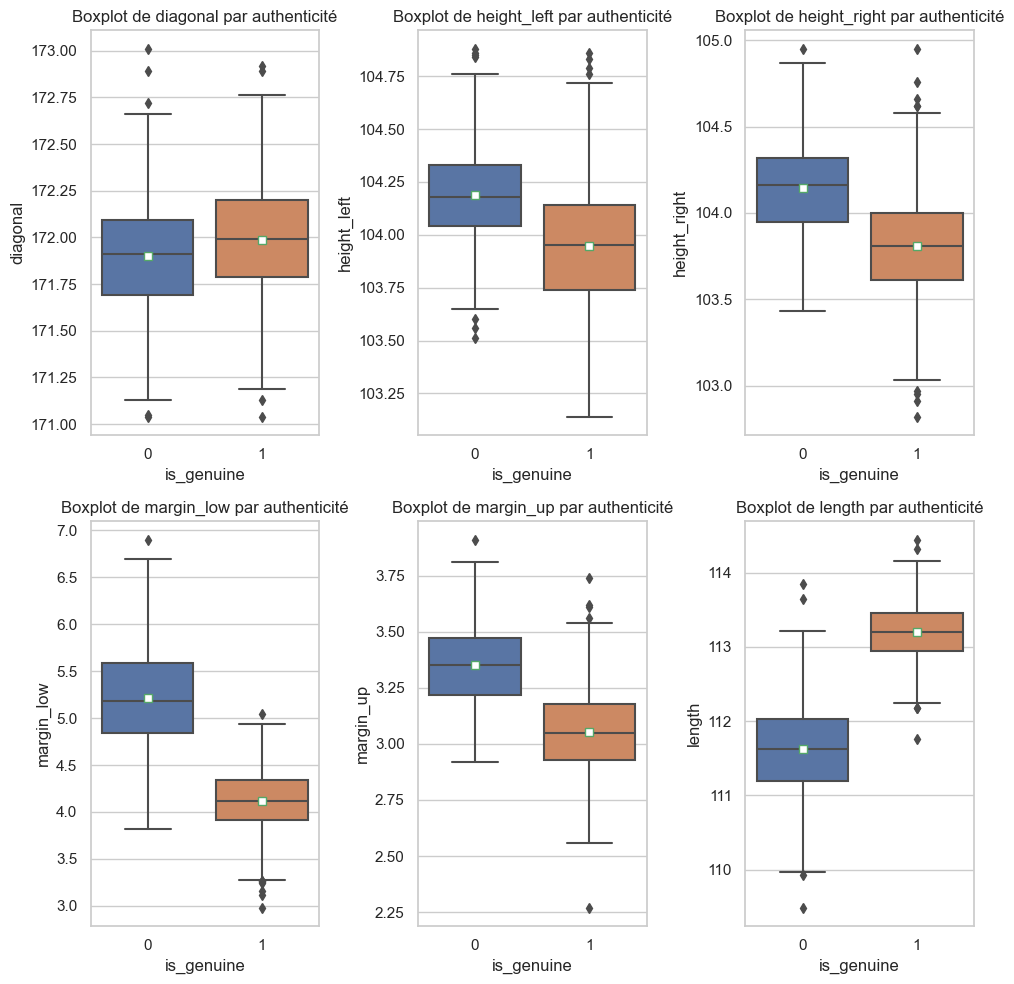

In [107]:
# Créez une liste de DataFrames à partir de chaque variable en fonction de "authenticité"
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

for i, variable in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x="is_genuine", y=variable, data=data_final_ln, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white"})
    plt.title(f'Boxplot de {variable} par authenticité')

plt.tight_layout()
plt.show()

Visuellemnet, on constate que la transformation logarithmique n'a pas supprimé les outliers. Pour vérifier cette observation, nous allons comparer les listes d'indices des outliers avant et après la transformation logarithmique. 
Cela nous aidera à déterminer si la transformation a eu un impact significatif sur la détection des outliers.

In [108]:
def detecter_outliers(variable, authenticite):
    # Sélectionner les données en fonction de l'authenticité
    donnees = data_final_ln[data_final_ln['is_genuine'] == authenticite][variable]
    
    # Calculer le premier et le troisième quartile
    Q1 = np.percentile(donnees, 25)
    Q3 = np.percentile(donnees, 75)
    
    # Calculer l'intervalle interquartile (IQR)
    IQR = Q3 - Q1
    
    # Calculer les bornes supérieures et inférieures
    borne_sup = Q3 + 1.5 * IQR
    borne_inf = Q1 - 1.5 * IQR
    
    # Identifier les outliers
    outliers_sup = donnees[donnees > borne_sup]
    outliers_inf = donnees[donnees < borne_inf]
    
    return {'borne_sup': borne_sup, 'borne_inf': borne_inf, 'outliers_sup': outliers_sup, 'outliers_inf': outliers_inf}

# Liste des variables à examiner
variables = ['diagonal', 'height_left', 'height_right','margin_low', 'margin_up', 'length'] 

# Initialiser un dictionnaire pour stocker les résultats
resultats_outliers_ln = {}

# Parcourir chaque variable et authenticité
for variable in variables:
    for authenticite in [0, 1]:
        key = f'{variable}_authenticite_{authenticite}'
        resultats_outliers_ln[key] = detecter_outliers(variable, authenticite)
        
# Collecter les indices des outliers
indices_outliers_ln = []

for variable, resultats in resultats_outliers.items():
    indices_outliers_ln.extend(resultats["outliers_sup"].index.tolist())
    indices_outliers_ln.extend(resultats["outliers_inf"].index.tolist())

# Supprimer les lignes correspondantes de data_final
data_final_ln_sans_outliers = data_final_ln.drop(indices_outliers_ln)

# Trouver les indices des outliers qui sont présents dans l'ensemble original mais pas dans l'ensemble transformé
indices_outliers_uniquement_originaux = set(indices_outliers) - set(indices_outliers_ln)

# Trouver les indices des outliers qui sont présents dans l'ensemble transformé mais pas dans l'ensemble original
indices_outliers_uniquement_transformes = set(indices_outliers_ln) - set(indices_outliers)

# Afficher les résultats
print(f"Indices des outliers uniquement dans les données originales : {indices_outliers_uniquement_originaux}")
print(f"Indices des outliers uniquement dans les données transformées : {indices_outliers_uniquement_transformes}")

Indices des outliers uniquement dans les données originales : set()
Indices des outliers uniquement dans les données transformées : set()


La transformation logarythmique nous a laissé les mêmes outliers.
nous allons réexécuter l'analyse de régression logistique pour évaluer l'effet de cette transformation sur les coefficients et la performance du modèle.

In [109]:
# Diviser les données
X_train_ln_outlier, y_train_ln_outlier, X_test_ln_outlier, y_test_ln_outlier, variable_names = split_data(data_final_ln, 
                                                                                                       ['is_genuine', 'diagonal', 
                                                                                                        'height_left', 'height_right', 
                                                                                                        'margin_low', 'margin_up', 
                                                                                                        'length', 'height_left_ln', 
                                                                                                        'diagonal_ln'])

# Standardiser les données
# Calculer les moyennes et écarts types
means = X_train_ln_outlier.mean(axis=0)
stds = X_train_ln_outlier.std(axis=0)
# Centrage et mise à l'échelle manuels
X_train_ln_scaled = (X_train_ln_outlier - means) / stds
X_test_ln_scaled = (X_test_ln_outlier - means) / stds
# Ajouter une constante
X_train_ln_const = add_constant(X_train_ln_scaled)

# Entraîner le modèle
result_ln_outlier = train_logistic_regression(X_train_ln_const, y_train_ln_outlier)
print(result_ln_outlier.summary())

# Créer un DataFrame avec les noms des variables
variable_names_ln = create_variable_names_df(variable_names)
print(variable_names_ln)
print()

# Prédire sur l'ensemble de test
y_pred_ln_outlier = predict_logistic_regression(X_test_ln_scaled, result_ln_outlier)

# Évaluer les performances
performances_ln_outlier = evaluate_performance(y_test_ln_outlier, y_pred_ln_outlier, 'Avec outliers et log')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([performances_df, performances_ln_outlier], ignore_index=True)
print(performances_df)


Optimization terminated successfully.
         Current function value: 0.028467
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9549
Time:                        21:33:27   Log-Likelihood:                -34.160
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                1.163e-311
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7662      0.455      6.078      0.000       1.874       3.658
height_right_

In [110]:
# Créer un DataFrame pour X_train avec les colonnes appropriées
X_train_df = pd.DataFrame(X_train, columns=['Constant', 'x1', 'x2', 'x3','x4'])  

# Créer un DataFrame pour stocker les coefficients
coefficients_df = pd.DataFrame({
    'Variable': X_train_df.columns,
    'avec Outliers': result.params.values,
    'avec ln et Outliers': result_ln_outlier.params.values,
    'Sans Outliers': result_outlier.params.values

})

# Fusionner les deux DataFrames en utilisant la colonne "Variable"
coefficients_ln_df = variable_names_outlier.merge(coefficients_df, on='Variable', how='left')

# Afficher le DataFrame fusionné
print('Coefficients entre les modèles avec et sans transformation logarithmique et sans outliers')
print()
print(coefficients_ln_df)

Coefficients entre les modèles avec et sans transformation logarithmique et sans outliers

  Variable Nom de la variable  avec Outliers  avec ln et Outliers  \
0       x1       height_right      -0.745001            -0.756815   
1       x2         margin_low      -4.266289            -4.207396   
2       x3          margin_up      -2.417221            -2.444449   
3       x4             length       5.688544             5.621246   

   Sans Outliers  
0      -1.512829  
1      -5.543321  
2      -3.431632  
3       8.883107  


Les variations dans les coefficients entre les modèles avec et sans transformation logarithmique sont relativement légères. De plus, Les performances entre les modèles avec ou sans transformation logarithmique sont les mêmes.
La transformation logarithmique n'a pas eu un impact significatif sur les estimations des coefficients et Les performances.

Les coefficients des variables explicatives sont différents entre le modèle avec et sans la présence d'outliers.Cependant, Les performances du modèle sans les outliers sont légèrement plus faibles.

Nous allons donc continuer à travailler avec notre régression logistique effectué avec les outliers: le modèle 'result'.

In [111]:
# Utilisation des fonctions
features_to_drop = ['is_genuine','diagonal','height_left']

# Diviser les données
X_train, y_train, X_test, y_test, variable_names = split_data(data_final, features_to_drop)

# Standardiser les données
# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

# Ajouter la constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle de régression logistique
result = train_logistic_regression(X_train_const, y_train)

# Afficher les noms des variables
variable_names_df = create_variable_names_df(variable_names)

# Afficher le résumé du modèle
print(result.summary())
print(variable_names_df)

Optimization terminated successfully.
         Current function value: 0.027462
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9564
Time:                        21:33:27   Log-Likelihood:                -32.955
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5343      0.435      5.829      0.000       1.682       3.386
height_right    -0.745

##### Vérification de Significativité des variables avec p-value du Test de Wald

In [112]:
# Test de Wald:
print("après élimination des variables non-significatives:\n", result.wald_test_terms())

après élimination des variables non-significatives:
                                 chi2                  P>chi2  df constraint
const          [[33.97337536744838]]   5.587139666971541e-09              1
height_right   [[4.208675042007761]]     0.04021773922627347              1
margin_low    [[34.361951778908086]]   4.575817436019405e-09              1
margin_up      [[17.94874853760107]]  2.2693357697522943e-05              1
length         [[39.79213012914076]]   2.824810354366684e-10              1


##### Vérification de la multicolinéarité des variables

In [113]:
#Test de la multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor

# stocker dans une liste 'noms_variables'
noms_variables = ['height_right', 'margin_low', 'margin_up', 'length'] 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
vif["features"] = noms_variables  # Utilisez la liste des noms des variables
print(vif)

   VIF Factor      features
0    1.239563  height_right
1    1.890950    margin_low
2    1.418338     margin_up
3    2.139619        length


Des valeurs de VIF proches de 1 indiquent une faible corrélation entre la variable correspondante et les autres variables du modèle. En pratique, une valeur VIF supérieure à 10 pourrait suggérer une colinéarité problématique.

Dans notre cas, il ne semble pas y a donc pas de problème de colinéarité.

##### Identification et traitement des non linéarités

######  Test de Box-Tidewell

Le test de Box-Tidwell est utilisé pour détecter la non-linéarité entre les variables indépendantes continues et la variable dépendante dans un modèle de régression logistique.

Il consiste juste à inclure dans lemodèle l'intéraction de cette variable prédictrice X et de son log népérien, en créant une variable Z = X*log(X) à rajouter dans le modèle. Si le test sur le coefficient associé à Z est significatif, l'effet de la variable sur l'authenticité n’est pas log-linéaire. 

In [114]:
from Fonctions.projet_10 import perform_box_tidwell_test

# Appel de la fonction
var_cont = ['height_right', 'margin_low', 'margin_up', 'length'] 
perform_box_tidwell_test(data_final, var_cont)


>>> TEST pour height_right:log_height_right
         Current function value: 0.028445
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1494
Method:                           MLE   Df Model:                            5
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9553
Time:                        21:33:27   Log-Likelihood:                -42.667
converged:                      False   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1361.3319   1257.727     -1.082      0.279   -3826.432    1103.768
x2            -4.0384

C:\Users\aicha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\aicha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Le test sur le coefficient associé à log de "margin low" est significatif, l'effet de "margin_low" sur l'authenticité
n’est donc pas log-linéaire.

Discrétidation de la variable "margin_low":
La discrétisation de la variable "margin_low" est une étape importante pour gérer cette non-linéarité. Cela peut aider le modèle à mieux capturer la relation entre "margin_low" et la variable cible.

##### Discrétisation de la variable "margin_low"

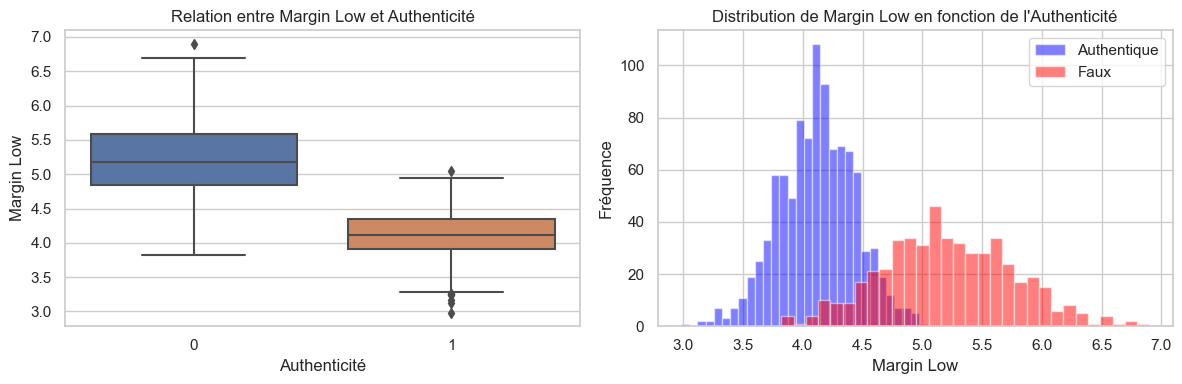

In [115]:
# Séparer les données en deux groupes : authentiques et faux
margin_low_authentic = data_final[data_final['is_genuine'] == 1]['margin_low']
margin_low_fake = data_final[data_final['is_genuine'] == 0]['margin_low']

# Créer une grille de sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Premier graphique : Boîte
sns.boxplot(x='is_genuine', y='margin_low', data=data_final, ax=axs[0])

# Ajouter des titres et des labels
axs[0].set_title('Relation entre Margin Low et Authenticité')
axs[0].set_xlabel('Authenticité')
axs[0].set_ylabel('Margin Low')

# Deuxième graphique : Histogramme
axs[1].hist(margin_low_authentic, bins=30, alpha=0.5, color='blue', label='Authentique')
axs[1].hist(margin_low_fake, bins=30, alpha=0.5, color='red', label='Faux')

# Ajouter un titre et des labels
axs[1].set_title('Distribution de Margin Low en fonction de l\'Authenticité')
axs[1].set_xlabel('Margin Low')
axs[1].set_ylabel('Fréquence')

# Ajouter une légende
axs[1].legend()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


###### Méthode 1: Discrétisation par découpe en 2 groupes déterminée visuellement

En me basant sur les graphiques ci-dessus, je choisis un seuil de 'margin_low'= 4.6 pour séparer en 2 groupes.

In [116]:
# Méthode 1: Discrétisation par découpe déterminée visuellement

# Définir les seuils pour la discrétisation
seuils = [-float('inf'), 4.6, float('inf')]

# Définir les labels pour les groupes
labels = [1, 0]

# Appliquer la discrétisation
data_final['margin_low_discretized'] = pd.cut(data_final['margin_low'], bins=seuils, labels=labels)

# Vérifier les intervalles créés
print(data_final['margin_low_discretized'].value_counts())


1    1006
0     494
Name: margin_low_discretized, dtype: int64


In [117]:
from Fonctions.projet_10 import train_evaluate_model_discretisation

# Utilisation de la fonction
data_final_discretized = data_final.copy()
# Appeler la fonction
y_test, y_pred = train_evaluate_model_discretisation(data_final_discretized, 'Discretisation_2_groupes')

# Évaluer les performances
performances = evaluate_performance(y_test, y_pred, 'Discretisation_2_groupes')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([df_performances_result, performances], ignore_index=True)
print(performances_df)

Optimization terminated successfully.
         Current function value: 0.046509
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9269
Time:                        21:33:28   Log-Likelihood:                -69.764
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9069      0.271      7.040      0.000       1.376       2.438
x1            -1.0973      0

###### Méthode 2: Discrétisation par découpe en 3 groupes établis visuellemnt

En me basant sur les graphiques de la variable "margin_low" ci-dessus, je séparer en 3 groupes.

In [118]:
# Définir les seuils pour la discrétisation
seuils = [-float('inf'), 4.5, 5, float('inf')]

# Définir les labels pour les groupes
labels = [1, 2, 3]

# Appliquer la discrétisation
data_final['margin_low_discretized'] = pd.cut(data_final['margin_low'], bins=seuils, labels=labels, include_lowest=True)

# Vérifier les intervalles créés
print(data_final['margin_low_discretized'].value_counts())

y_test, y_pred = train_evaluate_model_discretisation(data_final_discretized, 'Discretisation_3_groupes')

# Évaluer les performances
performances = evaluate_performance(y_test, y_pred, 'Discretisation_3_groupes')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([performances_df, performances], ignore_index=True)
print(performances_df)

1    943
3    321
2    236
Name: margin_low_discretized, dtype: int64
Optimization terminated successfully.
         Current function value: 0.046509
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9269
Time:                        21:33:28   Log-Likelihood:                -69.764
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9069      0.271     

###### Méthode 3: Discrétisation par KMeans

C:\Users\aicha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



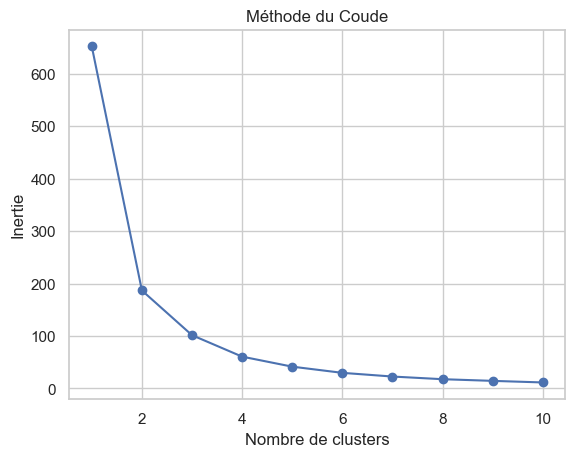

In [119]:
# Choisir une plage de nombre de clusters à tester (par exemple de 1 à 10)
num_clusters_range = range(1, 11)
inertia = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data_final_discretized[['margin_low']])
    inertia.append(kmeans.inertia_)

# Tracer la variation de l'inertie en fonction du nombre de clusters
plt.plot(num_clusters_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude')
plt.show()

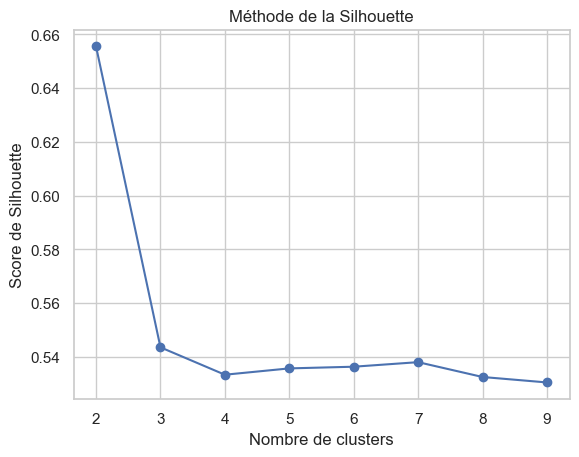

In [120]:
silhouette_scores = []
num_clusters_range = range(2, 10)

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_final_discretized[['margin_low']])
    silhouette_avg = silhouette_score(data_final_discretized[['margin_low']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer les scores de silhouette en fonction du nombre de clusters
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette')
plt.title('Méthode de la Silhouette')
plt.show()


Choix de k=2

In [121]:
# Méthode 3: Discrétisation par KMeans 2 clusters

# Définir le nombre de clusters
num_clusters = 2

# Créer un modèle K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Appliquer le clustering sur la variable "margin_low"
data_final_discretized['margin_low_discretized'] = kmeans.fit_predict(data_final_discretized[['margin_low']])

# Vérifier les clusters créés
print(data_final_discretized['margin_low_discretized'].value_counts())

y_test, y_pred = train_evaluate_model_discretisation(data_final_discretized, 'Discretisation_kmeans')

# Évaluer les performances
performances = evaluate_performance(y_test, y_pred, 'Discretisation_kmeans')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([performances_df, performances], ignore_index=True)
print(performances_df)

0    1082
1     418
Name: margin_low_discretized, dtype: int64
Optimization terminated successfully.
         Current function value: 0.035842
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9437
Time:                        21:33:31   Log-Likelihood:                -53.764
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7155      0.301      5.694 

###### Méthode 4 : Discrétisation par découpe en intervalles égaux (binning)

In [122]:
#Méthode 4: Discrétisation par découpe en intervalles égaux (binning)

# Définir le nombre de bins (intervalles)
num_bins = 5

data_final_discretized = data_final.copy()

# Discrétiser la variable "margin_low"
data_final_discretized['margin_low_discretized'] = pd.cut(data_final_discretized['margin_low'], bins=num_bins, labels=False)

# Vérifier les intervalles créés
print(data_final_discretized['margin_low_discretized'].value_counts())

y_test, y_pred = train_evaluate_model_discretisation(data_final_discretized, 'Discretisation_binning')

# Évaluer les performances
performances = evaluate_performance(y_test, y_pred, 'Discretisation_binning')

# Ajouter les performances au DataFrame global
performances_df = pd.concat([performances_df, performances], ignore_index=True)
print(performances_df)

1    838
2    331
3    174
0    132
4     25
Name: margin_low_discretized, dtype: int64
Optimization terminated successfully.
         Current function value: 0.035326
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9445
Time:                        21:33:31   Log-Likelihood:                -52.989
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.28

Les différentes méthodes de discrétisation me donnent des performances inférieures à mon modèle avec la variable "margin low" continue.
Je vais lancer le modèle en supprimant la variable "margin low".

In [123]:
# Utilisation des fonctions
features_to_drop = ['is_genuine','diagonal','height_left', "margin_low","margin_low_discretized"]

# Diviser les données
X_train, y_train, X_test, y_test, variable_names = split_data(data_final, features_to_drop)

# Standardiser les données
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

# Ajouter la constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle de régression logistique
result = train_logistic_regression(X_train_const, y_train)

# Afficher les noms des variables
variable_names_df = create_variable_names_df(variable_names)

# Afficher le résumé du modèle
print(result.summary())
print(variable_names_df)

Optimization terminated successfully.
         Current function value: 0.075374
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.8805
Time:                        21:33:31   Log-Likelihood:                -90.449
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                1.308e-288
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0049      0.238      8.420      0.000       1.538       2.472
x1            -1.2626      0

In [124]:
# Prédire sur l'ensemble de test
# Ajouter la constante
X_test_const = add_constant(X_test_scaled)
y_train_pred = predict_logistic_regression(X_train_const, result)
y_pred = predict_logistic_regression(X_test_const, result)

# Évaluer les performances du modèle
performances_train = evaluate_performance(y_train, y_train_pred, 'train sans margin_low')
performances_test = evaluate_performance(y_test, y_pred, 'test sans margin_low')

# Concaténer les deux DataFrames
df_performances = pd.concat([performances_train, performances_test], ignore_index=True)

# Ajouter les performances au DataFrame global
performances_df = pd.concat([ performances_df, df_performances], ignore_index=True)
performances_df

Méthode  Exactitude  Précision    Rappel  F1 Score
0                     train    0.991667   0.991400  0.996296  0.993842
1                      test    0.996667   0.994764  1.000000  0.997375
2  Discretisation_2_groupes    0.984000   0.986056  0.990000  0.988024
3  Discretisation_3_groupes    0.984000   0.986056  0.990000  0.988024
4     Discretisation_kmeans    0.989333   0.990040  0.994000  0.992016
5    Discretisation_binning    0.988667   0.991009  0.992000  0.991504
6     train sans margin_low    0.977500   0.979192  0.987654  0.983405
7      test sans margin_low    0.970000   0.954774  1.000000  0.976864

Toutes les méthodes avec ou sans discrétisation de "margin_low" offrent des performances très élevées. Cependant, la méthode initiale "Sans Discretisation" et en gardant la variable "margin_low"continue offre de meilleures performances (cf test sur le tableau ci-dessus).

Cela indique que la variable, même en tant que telle, apporte une contribution significative à la prédiction.

De plus, le modèle respecte d'autres hypothèses importantes.

Modèle de régression logistique finale choisi est le modèle se basant sur les variables  "height_right, margin_low, margin_up et length " avec les outliers et sans transformation ni discrétisation.

In [125]:
# Utilisation des fonctions
features_to_drop = ['is_genuine','diagonal','height_left',"margin_low_discretized"]

# Diviser les données
X_train, y_train, X_test, y_test, variable_names = split_data(data_final, features_to_drop)

# Standardiser les données
# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

# Ajouter la constante
X_train_const = add_constant(X_train_scaled)

# Entraîner le modèle de régression logistique
result = train_logistic_regression(X_train_const, y_train)

# Afficher les noms des variables
variable_names_df = create_variable_names_df(variable_names)

# Afficher le résumé du modèle
print(result.summary())
print(variable_names_df)

Optimization terminated successfully.
         Current function value: 0.027462
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9564
Time:                        21:33:31   Log-Likelihood:                -32.955
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5343      0.435      5.829      0.000       1.682       3.386
height_right    -0.745

##### 4.2.2.4 Performance du modèle de régression logistique <a class="anchor" id="section_4_2_2_4"></a>

In [126]:
# Ajouter la constante
X_test_const = add_constant(X_test_scaled)
y_test_pred_rl = predict_logistic_regression(X_test_const, result)
y_train_pred_rl = predict_logistic_regression(X_train_const, result)

####  Matrice de confusion

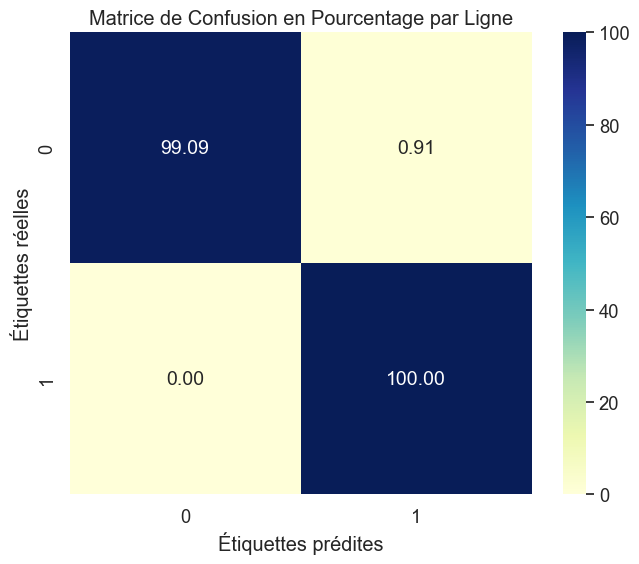

In [127]:
# Calculer la matrice de confusion pour le modèle 
confusion_matrix = confusion_matrix(y_test, y_test_pred_rl)

from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion pour le modèle 
confusion_matrix = confusion_matrix(y_test, y_test_pred_rl)

# Convertir la matrice de confusion en pourcentage par ligne
confusion_matrix_pct = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

# Créer un heatmap à partir de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police si nécessaire
sns.heatmap(confusion_matrix_pct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True,
            annot_kws={"size": 14}, square=True)
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de Confusion en Pourcentage par Ligne')
plt.show()

Avec une précision de 100% pour les billets authentiques et de 99% pour les faux billets, la régression logistique montre une performance exceptionnelle.

#### Performance du modèle

In [128]:
train_classification_report_rl = classification_report(y_train, y_train_pred_rl)
test_classification_report_rl = classification_report(y_test, y_test_pred_rl)

# Affichez les rapports de classification pour l'ensemble d'entraînement
print("Classification Report on Train Set:\n", train_classification_report_rl)

# Affichez les rapports de classification pour l'ensemble de test
print("Classification Report on Test Set :\n", test_classification_report_rl)

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       390
           1       0.99      1.00      0.99       810

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

Classification Report on Test Set :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       110
           1       0.99      1.00      1.00       190

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Les rapports de classification indiquent des performances très élevées , avec des scores proches de 1 pour la plupart des métriques. Cela suggère que les modèles sont très précis dans leurs prédictions.

In [129]:
# Calculer les métriques ROC
fpr_test, tpr_test, _, roc_auc_test = calculate_roc_metrics(y_test, y_test_pred_rl)
fpr_train, tpr_train, _, roc_auc_train = calculate_roc_metrics(y_train, y_train_pred_rl)
fpr_rl, tpr_rl, _, roc_auc_rl = fpr_test, tpr_test, _, roc_auc_test

# Calculer les performances
train_metrics = evaluate_performance(y_train, y_train_pred_rl, 'Entraînement')
test_metrics = evaluate_performance(y_test, y_test_pred_rl, 'Test')

# Créez df avec les métriques 
metrics_rl = {
    'Méthode': 'Régression Logistique',
    'Accuracy': test_metrics.loc[0, 'Exactitude'],
    'Précision': test_metrics.loc[0, 'Précision'],
    'Rappel': test_metrics.loc[0, 'Rappel'],
    'AUC': roc_auc_test,
    'F1 Score': test_metrics.loc[0, 'F1 Score']
}
df_rl = pd.DataFrame(metrics_rl, index=[0])

# Ajouter à votre DataFrame
metrics_rl = pd.DataFrame({
    'Métrique': ['AUC', 'Accuracy', 'Précision', 'Recall', 'F1 Score'],
    'Entraînement': [roc_auc_train, train_metrics.loc[0, 'Exactitude'], train_metrics.loc[0, 'Précision'],
                     train_metrics.loc[0, 'Rappel'], train_metrics.loc[0, 'F1 Score']],
    'Test': [roc_auc_test, test_metrics.loc[0, 'Exactitude'], test_metrics.loc[0, 'Précision'],
              test_metrics.loc[0, 'Rappel'], test_metrics.loc[0, 'F1 Score']]
})

# Afficher le tableau
print(metrics_rl)

    Métrique  Entraînement      Test
0        AUC      0.989174  0.995455
1   Accuracy      0.991667  0.996667
2  Précision      0.991400  0.994764
3     Recall      0.996296  1.000000
4   F1 Score      0.993842  0.997375


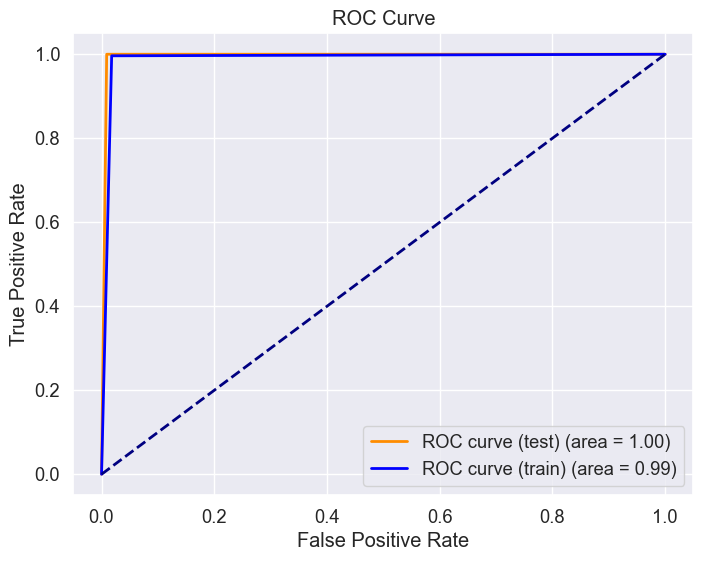

In [130]:
# Plot des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (test) (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (train) (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

##### Validation croisée

In [131]:
# Divisez les données en variables explicatives (X) et variable cible (y) pour l'ensemble des données
X_total = data_final[['height_right', 'margin_low', 'margin_up', 'length']]
y_total = data_final['is_genuine']

# Standardisez les données (centrage et mise à l'échelle)
# Calculer les moyennes et écarts types
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)
# Centrage et mise à l'échelle manuels
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

X_total =sm.add_constant(X_total)

# Résumé du modèle avec statsmodels
model_total = sm.Logit(y_total, X_total)
model_total = model_total.fit()
print(model_total.summary())
print()

# Initialisez le modèle de régression logistique
logistic_model = LogisticRegression()

# Effectuez la validation croisée
scores = cross_val_score(logistic_model, X_total, y_total, cv=5, scoring='accuracy')

print("Accuracies pour chaque fold:", scores)
print(f"Accuracy moyenne: {np.mean(scores):.2f}")


Optimization terminated successfully.
         Current function value: 0.028950
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1495
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9545
Time:                        21:33:32   Log-Likelihood:                -43.425
converged:                       True   LL-Null:                       -954.77
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -323.0566    139.703     -2.312      0.021    -596.869     -49.244
height_right    -2.810

#### Optimisation des hyperparamètres en valisation croisée Train Test: Ridge / Lasso

Pour trouver les meilleurs paramètres qui maximisent les performances de votre modèle, nous allons définir et entraîner une grille de recherche pour optimiser les hyperparamètres de notre modèle de régression logistique avec régularisation (Ridge/Lasso). 

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir les hyper-paramètres à optimiser
param_grid = {
    'penalty': ['l1', 'l2'],  # Choisir entre L1 (Lasso) ou L2 (Ridge)
    'C': [0.01, 0.1, 1, 10, 100]  # Paramètre de régularisation
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid,scoring='accuracy', cv=10)

# Entraîner sur les données d'entraînement
grid_search.fit(X_train_const, y_train)

C:\Users\aicha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aicha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aicha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aicha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [136]:
# Afficher les résultats sous forme de DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Afficher les colonnes pertinentes (paramètres et scores)
print(results_df[['param_penalty', 'param_C', 'mean_test_score']])

  param_penalty param_C  mean_test_score
0            l1    0.01              NaN
1            l2    0.01         0.980833
2            l1     0.1              NaN
3            l2     0.1         0.986667
4            l1       1              NaN
5            l2       1         0.988333
6            l1      10              NaN
7            l2      10         0.990000
8            l1     100              NaN
9            l2     100         0.990833


In [137]:
# Obtenir les meilleurs hyper-paramètres
best_params = grid_search.best_params_
print("Meilleurs hyper-paramètres :", best_params)

# Évaluer la performance sur l'ensemble de test
accuracy = grid_search.score(X_test_const, y_test)
print("Précision sur l'ensemble de test :", accuracy)

Meilleurs hyper-paramètres : {'C': 100, 'penalty': 'l2'}
Précision sur l'ensemble de test : 0.9966666666666667


In [141]:
# Utiliser le meilleur modèle pour faire des prédictions sur l'ensemble de test
best_model = grid_search.best_estimator_
best_pred_y_test = best_model.predict(X_test_const)
best_pred_y_train = best_model.predict(X_train_const)

Nous allons maintenant comparer les performances de notre modèle avant et après l'optimisation des hyperparamètres. 

In [145]:
# Calculer les métriques ROC
fpr_test, tpr_test, _, roc_auc_test = calculate_roc_metrics(y_test, best_pred_y_test)
fpr_train, tpr_train, _, roc_auc_train = calculate_roc_metrics(y_train, best_pred_y_train)
fpr_best_rl, tpr_best_rl, _, roc_auc_best_rl = fpr_test, tpr_test, _, roc_auc_test

# Calculer les performances
train_metrics = evaluate_performance(y_train, best_pred_y_train, 'Entraînement optimisé')
test_metrics = evaluate_performance(y_test, best_pred_y_test, 'Test optimisé')

# Créez df avec les métriques 
metrics_best_rl = {
    'Méthode': 'Régression Logistique',
    'Accuracy': test_metrics.loc[0, 'Exactitude'],
    'Précision': test_metrics.loc[0, 'Précision'],
    'Rappel': test_metrics.loc[0, 'Rappel'],
    'AUC': roc_auc_test,
    'F1 Score': test_metrics.loc[0, 'F1 Score']
}
df_best_rl = pd.DataFrame(metrics_best_rl, index=[0])

# Ajouter à votre DataFrame
metrics_best_rl = pd.DataFrame({
    'Métrique': ['AUC', 'Accuracy', 'Précision', 'Recall', 'F1 Score'],
    'Entraînement optimisé': [roc_auc_train, train_metrics.loc[0, 'Exactitude'], train_metrics.loc[0, 'Précision'],
                     train_metrics.loc[0, 'Rappel'], train_metrics.loc[0, 'F1 Score']],
    'Test optimisé': [roc_auc_test, test_metrics.loc[0, 'Exactitude'], test_metrics.loc[0, 'Précision'],
              test_metrics.loc[0, 'Rappel'], test_metrics.loc[0, 'F1 Score']]
})

# Fusionner les DataFrames par la colonne 'Métrique'
merged_metrics = pd.merge(metrics_rl, metrics_best_rl, on='Métrique', suffixes=('_rl', '_best_rl'))
merged_metrics

Métrique  Entraînement      Test  Entraînement optimisé  Test optimisé
0        AUC      0.989174  0.995455               0.989174       0.995455
1   Accuracy      0.991667  0.996667               0.991667       0.996667
2  Précision      0.991400  0.994764               0.991400       0.994764
3     Recall      0.996296  1.000000               0.996296       1.000000
4   F1 Score      0.993842  0.997375               0.993842       0.997375

L'optimisation des hyperparamètres ne produit pas d'amélioration des performances du modèle.

##### 4.2.2.5 Application sur des donnes inconnues <a class="anchor" id="section_4_2_2_5"></a>

In [ ]:
# Charger les nouvelles données à partir du fichier CSV
test_rl = pd.read_csv('billets_production2.csv', sep=',')
test_rl

In [ ]:
# Sélectionner les colonnes pour les caractéristiques
features = ["height_right","margin_low","margin_up","length"]

# Sélectionner les données de test
x_test_rl = test_rl[features]

# Standardisez les données (centrage et mise à l'échelle)
# Centrage et mise à l'échelle manuels
x_test_rl = (x_test_rl - means) / stds

# Ajouter une constante (terme d'interception) à X_train
x_test_rl = sm.add_constant(x_test_rl)

# Faire des prédictions sur les données de test
test_rl["proba_rl"] = result.predict(x_test_rl)
test_rl["y_pred_rl"] = (result.predict(x_test_rl) >= 0.5).astype(int)

# Rajouter une colonne 'identification'
test_rl['identification'] = ['vrai' if i == 1 else 'faux' for i in test_rl['y_pred_rl']]

# Affichage des résultats
print(test_rl[["id","proba_rl","y_pred_rl",'identification']])

# Afficher le compte de vrais et faux
print("\nCompte des billets identifiés:")
compte_identifications = test_rl['identification'].value_counts()
        
for label, count in compte_identifications.items():
    print(f"Nombre de billets identifiés comme {'vrai' if label == 1 else 'faux'} : {count}")

## 5 Comparaison des méthodes de classification et choix final <a class="anchor" id="chapter5"></a>

In [ ]:
# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_kmeans, tpr_kmeans, color='darkorange', lw=2, label='K-means (AUC = %0.2f)' % roc_auc_kmeans)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='k-NN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rl, tpr_rl, color='green', lw=2, label='Régression Logistique (AUC = %0.2f)' % roc_auc_rl)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Concaténez les DataFrames avec les métriques des 3 méthodes
summary_table = pd.concat([df_Kmeans, df_knn, df_rl], ignore_index=True)
summary_table

Dans l'ensemble, les trois algorithmes ont démontré des performances exceptionnelles dans la détection des faux billets.

Les 3 méthodes sont extrêmement performantes mais nous choisissons de continuer de travailler avec la Régression logistique qui a des performances légèrement mailleures.

In [ ]:
import joblib

# Sauvegarder le modèle
joblib.dump(result, 'modele_regression_logistique.pkl')

# Plus tard, pour charger le modèle
modele_regression_logistique = joblib.load('modele_regression_logistique.pkl')

## 6 Fonction finale <a class="anchor" id="chapter6"></a>

In [ ]:
from Fonctions.detecteur_faux_billets import identifier_faux_billets

In [ ]:
# Charger les nouvelles données à partir du fichier CSV
billets_production = pd.read_csv('billets_test.csv', sep=',')

# Sélectionner les colonnes pour les caractéristiques
features = ["height_right","margin_low","margin_up","length"]

# Utilisation de la fonction pour identifier les faux billets
test = identifier_faux_billets(billets_production, features, modele_regression_logistique, means, stds)

# Rajouter une colonne 'identification'
test['identification'] = ['vrai' if i == 1 else 'faux' for i in test['Prédiction']]

# Affichage des résultats
print(test[["id","Probabilite_Vraisemblance","Prédiction","identification"]])
        
# Afficher le compte de vrais et faux
print("\nCompte des billets identifiés:")
compte_identifications = test['Prédiction'].value_counts()

for label, count in compte_identifications.items():
    print(f"Nombre de billets identifiés comme {'vrai' if label == 1 else 'faux'} : {count}")

Cet algorithme est maintenant prêt à être déployé et utilisé pour identifier les faux billets avec précision et fiabilité.